In [1]:
import os
import subprocess
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy

In [2]:
def rust_k_circ(ts, vs):
    with open("temp.csv" , mode= "w") as f:
        wtr = csv.writer(f)

        wtr.writerow(ts)
        wtr.writerow(vs)

    rust_path = "~/Documents/HML/cleaning/ABM/fp/ripleys_k/target/release/ripleys_k"
    current_path = os.getcwd()
    
    os.system(f"{rust_path} {current_path}/temp.csv {current_path}/temp_out.csv 1")

    with open("temp_out.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out = [float(a) for a in v]
            break
    
    os.system(f"rm {current_path}/temp.csv")
    os.system(f"rm {current_path}/temp_out.csv")
    return out

def expectation_diff(vs, res=50):
    ts = np.linspace(0,0.5,res)
    ks = rust_k_circ(ts,vs)
    ex_ks = 2*ts - ts**2
    diffs = np.abs(ks-ex_ks)
    return np.average(diffs), ts, ks

In [3]:
def mem_run(taxis, mem_rate, diff, output, f_ic, s_ic):
    with open("temp_ics.csv", mode="w") as f:
        wtr = csv.writer(f)

        wtr.writerow(f_ic)
        wtr.writerow(s_ic)

    current_path = os.getcwd()
    csv_path = current_path + "/temp_ics.csv"

    pros = subprocess.Popen(f"cd sp && cargo run {taxis} {mem_rate} {diff} {output} {csv_path}", shell=True, stdout=subprocess.DEVNULL)
    pros.wait()
    os.system(f"rm {current_path}/temp_ics.csv")

In [161]:
c_count = 25
mem_run(0,0.5,0.3,"../mem_run", linspace_circ(c_count,200), linspace_circ(c_count,25))

    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.5 0.3 ../mem_run /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`
rm: cannot remove '/home/jonatank/Documents/HML/cleaning/ABM/fp/temp.csv': No such file or directory


In [4]:
dir_to_get = "mem_run/"
run_len = len(os.listdir(dir_to_get))
station = []
fish = []
for i in range(run_len):
    out = []
    with open(dir_to_get+f"{i}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        station.append(out[0])
        fish.append(out[1])

FileNotFoundError: [Errno 2] No such file or directory: 'mem_run/'

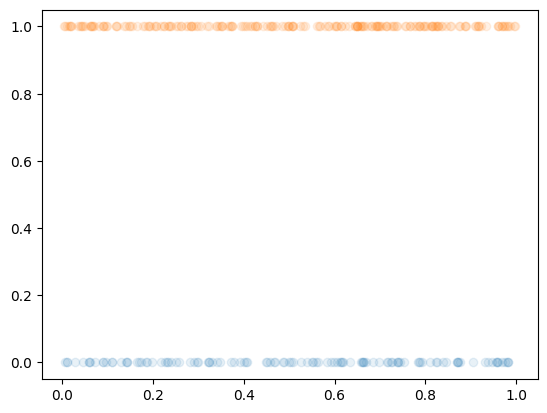

In [160]:
index = -1
plt.scatter(station[index], np.zeros_like(station[index]),alpha=0.1)
plt.scatter(fish[index], np.zeros_like(fish[index])+1,alpha=0.1)

In [5]:
def linspace_circ(clump_count, num):
    return np.array([np.linspace(1/(2*clump_count), 1 - (1/(2*clump_count)), clump_count)[i%clump_count] for i in range(num)])


In [6]:
ics = []
ics.append([np.random.rand(200), np.random.rand(25)])
ics.append([linspace_circ(200,200), linspace_circ(25,25)])
ics.append([linspace_circ(6,200),linspace_circ(10,25)])
ics.append([linspace_circ(3,200), linspace_circ(3,25)])
ics.append([linspace_circ(1,200), linspace_circ(1,25)])

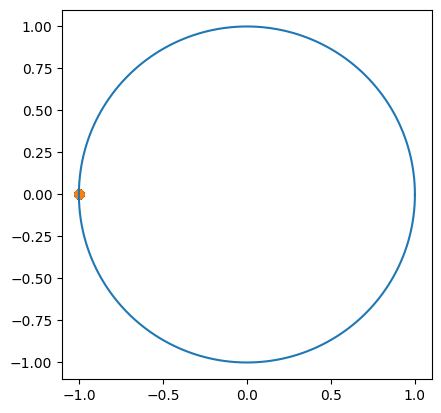

In [7]:
i=4
ts = np.linspace(0,2*np.pi, 200)
plt.plot(np.cos(ts),np.sin(ts))
plt.scatter(np.cos(2*np.pi*ics[i][0]), np.sin(2*np.pi*ics[i][0]), alpha=0.2)
plt.scatter(np.cos(2*np.pi*ics[i][1]), np.sin(2*np.pi*ics[i][1]), alpha=0.5)
plt.gca().set_aspect('equal')

In [171]:
# mems = np.linspace(0,0.5,30)
# diffs = np.linspace(0,0.3,30)
# for r in range(5):
#     for i, mem in enumerate(mems):
#         for j, diff in enumerate(diffs):
#             print(f"mem: {mem},   diff: {diff} ,   {r*len(diffs)*len(mems)+ i*len(diffs)+j} / {len(mems)*len(diffs)*5}" )
#             mem_run(0,mem,diff,f"../mem_sens_ics/run_{r}/mem_{mem}/diff_{diff}", ics[r][0], ics[r][1])


mem: 0.0,   diff: 0.0 ,   0 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.23s
     Running `target/debug/fp 0 0.0 0.0 ../mem_sens_ics/run_0/mem_0.0/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.010344827586206896 ,   1 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.0/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.020689655172413793 ,   2 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.0/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.03103448275862069 ,   3 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.0/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.041379310344827586 ,   4 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.0/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.05172413793103448 ,   5 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.0/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.06206896551724138 ,   6 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.0/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.07241379310344828 ,   7 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.0/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.08275862068965517 ,   8 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.0/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.09310344827586206 ,   9 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.0/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.10344827586206896 ,   10 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.0/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.11379310344827587 ,   11 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.0/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.12413793103448276 ,   12 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.0/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.13448275862068965 ,   13 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.0/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.14482758620689656 ,   14 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.0 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.0/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.15517241379310345 ,   15 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.0/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.16551724137931034 ,   16 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.0 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.0/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.17586206896551723 ,   17 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.0/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.18620689655172412 ,   18 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.0/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.19655172413793104 ,   19 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.0/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.20689655172413793 ,   20 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.0/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.21724137931034482 ,   21 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.0/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.22758620689655173 ,   22 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.0/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.23793103448275862 ,   23 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.0/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2482758620689655 ,   24 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.0/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.25862068965517243 ,   25 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.0/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2689655172413793 ,   26 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.0/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2793103448275862 ,   27 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.0/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2896551724137931 ,   28 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.0/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.3 ,   29 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.3 ../mem_sens_ics/run_0/mem_0.0/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.0 ,   30 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.0 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.010344827586206896 ,   31 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.020689655172413793 ,   32 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.03103448275862069 ,   33 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.041379310344827586 ,   34 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.017241379310344827 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.05172413793103448 ,   35 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.06206896551724138 ,   36 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.07241379310344828 ,   37 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.08275862068965517 ,   38 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.09310344827586206 ,   39 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.10344827586206896 ,   40 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.11379310344827587 ,   41 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.12413793103448276 ,   42 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.13448275862068965 ,   43 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.14482758620689656 ,   44 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.15517241379310345 ,   45 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.16551724137931034 ,   46 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.17586206896551723 ,   47 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.18620689655172412 ,   48 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.19655172413793104 ,   49 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.20689655172413793 ,   50 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.21724137931034482 ,   51 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.22758620689655173 ,   52 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.23793103448275862 ,   53 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2482758620689655 ,   54 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.25862068965517243 ,   55 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.017241379310344827 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2689655172413793 ,   56 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2793103448275862 ,   57 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2896551724137931 ,   58 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.3 ,   59 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.3 ../mem_sens_ics/run_0/mem_0.017241379310344827/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.0 ,   60 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.0 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.010344827586206896 ,   61 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.020689655172413793 ,   62 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.03103448275862069 ,   63 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.041379310344827586 ,   64 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.05172413793103448 ,   65 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.06206896551724138 ,   66 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.07241379310344828 ,   67 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.08275862068965517 ,   68 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.09310344827586206 ,   69 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.034482758620689655 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.10344827586206896 ,   70 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.11379310344827587 ,   71 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.12413793103448276 ,   72 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.13448275862068965 ,   73 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.14482758620689656 ,   74 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.15517241379310345 ,   75 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.034482758620689655 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.16551724137931034 ,   76 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.17586206896551723 ,   77 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.18620689655172412 ,   78 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.19655172413793104 ,   79 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.20689655172413793 ,   80 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.21724137931034482 ,   81 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.22758620689655173 ,   82 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.034482758620689655 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.23793103448275862 ,   83 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2482758620689655 ,   84 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.25862068965517243 ,   85 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2689655172413793 ,   86 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2793103448275862 ,   87 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2896551724137931 ,   88 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.3 ,   89 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.3 ../mem_sens_ics/run_0/mem_0.034482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.0 ,   90 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.0 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.010344827586206896 ,   91 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.020689655172413793 ,   92 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.03103448275862069 ,   93 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.041379310344827586 ,   94 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.05172413793103448 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.05172413793103448 ,   95 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.06206896551724138 ,   96 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.07241379310344828 ,   97 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.08275862068965517 ,   98 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.09310344827586206 ,   99 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.10344827586206896 ,   100 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.11379310344827587 ,   101 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.12413793103448276 ,   102 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.13448275862068965 ,   103 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.14482758620689656 ,   104 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.15517241379310345 ,   105 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.16551724137931034 ,   106 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.17586206896551723 ,   107 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.18620689655172412 ,   108 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.19655172413793104 ,   109 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.20689655172413793 ,   110 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.21724137931034482 ,   111 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.22758620689655173 ,   112 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.23793103448275862 ,   113 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2482758620689655 ,   114 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.25862068965517243 ,   115 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2689655172413793 ,   116 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2793103448275862 ,   117 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2896551724137931 ,   118 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.3 ,   119 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.3 ../mem_sens_ics/run_0/mem_0.05172413793103448/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.0 ,   120 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.0 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.010344827586206896 ,   121 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.020689655172413793 ,   122 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.03103448275862069 ,   123 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.06896551724137931 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.041379310344827586 ,   124 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.05172413793103448 ,   125 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.06896551724137931 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.06206896551724138 ,   126 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.07241379310344828 ,   127 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.08275862068965517 ,   128 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.09310344827586206 ,   129 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.10344827586206896 ,   130 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.11379310344827587 ,   131 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.12413793103448276 ,   132 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.13448275862068965 ,   133 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.14482758620689656 ,   134 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.15517241379310345 ,   135 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.06896551724137931 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.16551724137931034 ,   136 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.17586206896551723 ,   137 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.18620689655172412 ,   138 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.19655172413793104 ,   139 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.20689655172413793 ,   140 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.21724137931034482 ,   141 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.22758620689655173 ,   142 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.23793103448275862 ,   143 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2482758620689655 ,   144 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.25862068965517243 ,   145 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2689655172413793 ,   146 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2793103448275862 ,   147 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2896551724137931 ,   148 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.3 ,   149 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.3 ../mem_sens_ics/run_0/mem_0.06896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.0 ,   150 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.0 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.010344827586206896 ,   151 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.020689655172413793 ,   152 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.03103448275862069 ,   153 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.041379310344827586 ,   154 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.05172413793103448 ,   155 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.06206896551724138 ,   156 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.07241379310344828 ,   157 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.08275862068965517 ,   158 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.09310344827586206 ,   159 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.10344827586206896 ,   160 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.11379310344827587 ,   161 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.12413793103448276 ,   162 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.13448275862068965 ,   163 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.14482758620689656 ,   164 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.15517241379310345 ,   165 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.16551724137931034 ,   166 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.17586206896551723 ,   167 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.18620689655172412 ,   168 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.19655172413793104 ,   169 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.20689655172413793 ,   170 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.21724137931034482 ,   171 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.22758620689655173 ,   172 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.23793103448275862 ,   173 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2482758620689655 ,   174 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.25862068965517243 ,   175 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2689655172413793 ,   176 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2793103448275862 ,   177 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2896551724137931 ,   178 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.3 ,   179 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.08620689655172414 0.3 ../mem_sens_ics/run_0/mem_0.08620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.0 ,   180 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.0 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.010344827586206896 ,   181 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.020689655172413793 ,   182 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.03103448275862069 ,   183 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.041379310344827586 ,   184 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.05172413793103448 ,   185 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.06206896551724138 ,   186 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.07241379310344828 ,   187 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.10344827586206896 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.08275862068965517 ,   188 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.10344827586206896 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.09310344827586206 ,   189 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.10344827586206896 ,   190 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.11379310344827587 ,   191 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.12413793103448276 ,   192 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.13448275862068965 ,   193 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.14482758620689656 ,   194 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.15517241379310345 ,   195 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.16551724137931034 ,   196 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.17586206896551723 ,   197 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.18620689655172412 ,   198 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.19655172413793104 ,   199 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.20689655172413793 ,   200 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.21724137931034482 ,   201 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.22758620689655173 ,   202 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.23793103448275862 ,   203 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2482758620689655 ,   204 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.25862068965517243 ,   205 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2689655172413793 ,   206 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2793103448275862 ,   207 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2896551724137931 ,   208 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.3 ,   209 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.3 ../mem_sens_ics/run_0/mem_0.10344827586206896/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.0 ,   210 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.0 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.010344827586206896 ,   211 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.020689655172413793 ,   212 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.12068965517241378 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.03103448275862069 ,   213 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.12068965517241378 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.041379310344827586 ,   214 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.05172413793103448 ,   215 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.06206896551724138 ,   216 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.07241379310344828 ,   217 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.08275862068965517 ,   218 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.09310344827586206 ,   219 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.10344827586206896 ,   220 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.11379310344827587 ,   221 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.12413793103448276 ,   222 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.13448275862068965 ,   223 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.14482758620689656 ,   224 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.15517241379310345 ,   225 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.16551724137931034 ,   226 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.17586206896551723 ,   227 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.18620689655172412 ,   228 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.19655172413793104 ,   229 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.20689655172413793 ,   230 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.21724137931034482 ,   231 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.22758620689655173 ,   232 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.23793103448275862 ,   233 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2482758620689655 ,   234 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.25862068965517243 ,   235 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2689655172413793 ,   236 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2793103448275862 ,   237 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2896551724137931 ,   238 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.3 ,   239 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.3 ../mem_sens_ics/run_0/mem_0.12068965517241378/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.0 ,   240 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.0 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.010344827586206896 ,   241 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.020689655172413793 ,   242 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.03103448275862069 ,   243 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.13793103448275862 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.041379310344827586 ,   244 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.05172413793103448 ,   245 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.06206896551724138 ,   246 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.07241379310344828 ,   247 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.08275862068965517 ,   248 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.09310344827586206 ,   249 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.10344827586206896 ,   250 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.11379310344827587 ,   251 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.12413793103448276 ,   252 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.13448275862068965 ,   253 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.14482758620689656 ,   254 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.15517241379310345 ,   255 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.16551724137931034 ,   256 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.13793103448275862 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.17586206896551723 ,   257 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.18620689655172412 ,   258 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.19655172413793104 ,   259 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.20689655172413793 ,   260 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.21724137931034482 ,   261 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.22758620689655173 ,   262 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.23793103448275862 ,   263 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2482758620689655 ,   264 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.25862068965517243 ,   265 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2689655172413793 ,   266 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2793103448275862 ,   267 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2896551724137931 ,   268 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.13793103448275862 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.3 ,   269 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.3 ../mem_sens_ics/run_0/mem_0.13793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.0 ,   270 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.0 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.010344827586206896 ,   271 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.020689655172413793 ,   272 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.03103448275862069 ,   273 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.041379310344827586 ,   274 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.05172413793103448 ,   275 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.06206896551724138 ,   276 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.07241379310344828 ,   277 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.08275862068965517 ,   278 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.09310344827586206 ,   279 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.10344827586206896 ,   280 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.11379310344827587 ,   281 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.12413793103448276 ,   282 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.13448275862068965 ,   283 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.14482758620689656 ,   284 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.15517241379310345 ,   285 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.16551724137931034 ,   286 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.17586206896551723 ,   287 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.18620689655172412 ,   288 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.19655172413793104 ,   289 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.20689655172413793 ,   290 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.21724137931034482 ,   291 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.22758620689655173 ,   292 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.23793103448275862 ,   293 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2482758620689655 ,   294 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.25862068965517243 ,   295 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.15517241379310345 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2689655172413793 ,   296 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2793103448275862 ,   297 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2896551724137931 ,   298 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.3 ,   299 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.3 ../mem_sens_ics/run_0/mem_0.15517241379310345/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.0 ,   300 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.0 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.010344827586206896 ,   301 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.020689655172413793 ,   302 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.03103448275862069 ,   303 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.041379310344827586 ,   304 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.05172413793103448 ,   305 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.06206896551724138 ,   306 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.07241379310344828 ,   307 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.08275862068965517 ,   308 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.09310344827586206 ,   309 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.10344827586206896 ,   310 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.11379310344827587 ,   311 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.12413793103448276 ,   312 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.13448275862068965 ,   313 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.14482758620689656 ,   314 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.15517241379310345 ,   315 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.16551724137931034 ,   316 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.17586206896551723 ,   317 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.18620689655172412 ,   318 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.19655172413793104 ,   319 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.20689655172413793 ,   320 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.21724137931034482 ,   321 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.1724137931034483 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.22758620689655173 ,   322 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.23793103448275862 ,   323 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2482758620689655 ,   324 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.25862068965517243 ,   325 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2689655172413793 ,   326 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2793103448275862 ,   327 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2896551724137931 ,   328 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.11s
     Running `target/debug/fp 0 0.1724137931034483 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.3 ,   329 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.3 ../mem_sens_ics/run_0/mem_0.1724137931034483/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.0 ,   330 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.0 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.010344827586206896 ,   331 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.020689655172413793 ,   332 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.03103448275862069 ,   333 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.041379310344827586 ,   334 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.05172413793103448 ,   335 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.06206896551724138 ,   336 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.07241379310344828 ,   337 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.08275862068965517 ,   338 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.09310344827586206 ,   339 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.10344827586206896 ,   340 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.11379310344827587 ,   341 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.12413793103448276 ,   342 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.13448275862068965 ,   343 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.14482758620689656 ,   344 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.15517241379310345 ,   345 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.16551724137931034 ,   346 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.17586206896551723 ,   347 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.18620689655172412 ,   348 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.1896551724137931 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.19655172413793104 ,   349 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.20689655172413793 ,   350 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.21724137931034482 ,   351 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.22758620689655173 ,   352 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.23793103448275862 ,   353 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2482758620689655 ,   354 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.1896551724137931 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.25862068965517243 ,   355 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2689655172413793 ,   356 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2793103448275862 ,   357 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2896551724137931 ,   358 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.3 ,   359 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.3 ../mem_sens_ics/run_0/mem_0.1896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.0 ,   360 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.0 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.010344827586206896 ,   361 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.020689655172413793 ,   362 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.03103448275862069 ,   363 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.041379310344827586 ,   364 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.05172413793103448 ,   365 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.06206896551724138 ,   366 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.07241379310344828 ,   367 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.08275862068965517 ,   368 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.09310344827586206 ,   369 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.10344827586206896 ,   370 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.11379310344827587 ,   371 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.12413793103448276 ,   372 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.13448275862068965 ,   373 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.14482758620689656 ,   374 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.15517241379310345 ,   375 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.16551724137931034 ,   376 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.17586206896551723 ,   377 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.18620689655172412 ,   378 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.19655172413793104 ,   379 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.20689655172413793 ,   380 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.21724137931034482 ,   381 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.22758620689655173 ,   382 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.23793103448275862 ,   383 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2482758620689655 ,   384 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.25862068965517243 ,   385 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2689655172413793 ,   386 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.20689655172413793 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2793103448275862 ,   387 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2896551724137931 ,   388 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.3 ,   389 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.3 ../mem_sens_ics/run_0/mem_0.20689655172413793/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.0 ,   390 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.0 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.010344827586206896 ,   391 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.020689655172413793 ,   392 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.03103448275862069 ,   393 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.041379310344827586 ,   394 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.05172413793103448 ,   395 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.06206896551724138 ,   396 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.07241379310344828 ,   397 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.08275862068965517 ,   398 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.09310344827586206 ,   399 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.10344827586206896 ,   400 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.11379310344827587 ,   401 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.12413793103448276 ,   402 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.13448275862068965 ,   403 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.14482758620689656 ,   404 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.15517241379310345 ,   405 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.16551724137931034 ,   406 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.17586206896551723 ,   407 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.18620689655172412 ,   408 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.19655172413793104 ,   409 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.20689655172413793 ,   410 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.21724137931034482 ,   411 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.22413793103448276 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.22758620689655173 ,   412 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.23793103448275862 ,   413 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2482758620689655 ,   414 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.25862068965517243 ,   415 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2689655172413793 ,   416 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2793103448275862 ,   417 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2896551724137931 ,   418 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.3 ,   419 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.3 ../mem_sens_ics/run_0/mem_0.22413793103448276/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.0 ,   420 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.0 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.010344827586206896 ,   421 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.020689655172413793 ,   422 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.03103448275862069 ,   423 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.041379310344827586 ,   424 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.05172413793103448 ,   425 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.06206896551724138 ,   426 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.07241379310344828 ,   427 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.08275862068965517 ,   428 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.09310344827586206 ,   429 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.10344827586206896 ,   430 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.11379310344827587 ,   431 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.12413793103448276 ,   432 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.13448275862068965 ,   433 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.14482758620689656 ,   434 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.15517241379310345 ,   435 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.16551724137931034 ,   436 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.17586206896551723 ,   437 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.18620689655172412 ,   438 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.19655172413793104 ,   439 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.20689655172413793 ,   440 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.21724137931034482 ,   441 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.22758620689655173 ,   442 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.23793103448275862 ,   443 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2482758620689655 ,   444 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.25862068965517243 ,   445 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2689655172413793 ,   446 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2793103448275862 ,   447 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2896551724137931 ,   448 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.3 ,   449 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.3 ../mem_sens_ics/run_0/mem_0.24137931034482757/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.0 ,   450 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.0 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.010344827586206896 ,   451 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.020689655172413793 ,   452 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.03103448275862069 ,   453 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.041379310344827586 ,   454 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.05172413793103448 ,   455 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.06206896551724138 ,   456 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.07241379310344828 ,   457 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.08275862068965517 ,   458 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.09310344827586206 ,   459 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.10344827586206896 ,   460 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.11379310344827587 ,   461 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.12413793103448276 ,   462 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.13448275862068965 ,   463 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.14482758620689656 ,   464 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.15517241379310345 ,   465 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.16551724137931034 ,   466 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.17586206896551723 ,   467 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.18620689655172412 ,   468 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.19655172413793104 ,   469 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.20689655172413793 ,   470 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.21724137931034482 ,   471 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.22758620689655173 ,   472 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.23793103448275862 ,   473 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2482758620689655 ,   474 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.25862068965517243 ,   475 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.25862068965517243 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2689655172413793 ,   476 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2793103448275862 ,   477 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2896551724137931 ,   478 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.3 ,   479 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.3 ../mem_sens_ics/run_0/mem_0.25862068965517243/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.0 ,   480 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.0 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.010344827586206896 ,   481 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.020689655172413793 ,   482 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.03103448275862069 ,   483 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.041379310344827586 ,   484 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.05172413793103448 ,   485 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.06206896551724138 ,   486 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.07241379310344828 ,   487 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.08275862068965517 ,   488 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.09310344827586206 ,   489 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.10344827586206896 ,   490 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.11379310344827587 ,   491 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.12413793103448276 ,   492 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.13448275862068965 ,   493 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.14482758620689656 ,   494 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.15517241379310345 ,   495 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.16551724137931034 ,   496 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.17586206896551723 ,   497 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.18620689655172412 ,   498 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.19655172413793104 ,   499 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.20689655172413793 ,   500 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.21724137931034482 ,   501 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.22758620689655173 ,   502 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.23793103448275862 ,   503 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2482758620689655 ,   504 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.25862068965517243 ,   505 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2689655172413793 ,   506 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2793103448275862 ,   507 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2896551724137931 ,   508 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.3 ,   509 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.3 ../mem_sens_ics/run_0/mem_0.27586206896551724/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.0 ,   510 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.0 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.010344827586206896 ,   511 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.020689655172413793 ,   512 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.03103448275862069 ,   513 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.041379310344827586 ,   514 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.05172413793103448 ,   515 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.06206896551724138 ,   516 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.07241379310344828 ,   517 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.08275862068965517 ,   518 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.09310344827586206 ,   519 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.10344827586206896 ,   520 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.11379310344827587 ,   521 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.12413793103448276 ,   522 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.13448275862068965 ,   523 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.14482758620689656 ,   524 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.15517241379310345 ,   525 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.16551724137931034 ,   526 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.17586206896551723 ,   527 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.18620689655172412 ,   528 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.19655172413793104 ,   529 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.20689655172413793 ,   530 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.21724137931034482 ,   531 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.22758620689655173 ,   532 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.23793103448275862 ,   533 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2482758620689655 ,   534 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.25862068965517243 ,   535 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2689655172413793 ,   536 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2793103448275862 ,   537 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2896551724137931 ,   538 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.3 ,   539 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.3 ../mem_sens_ics/run_0/mem_0.29310344827586204/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.0 ,   540 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.0 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.010344827586206896 ,   541 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.020689655172413793 ,   542 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.03103448275862069 ,   543 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.041379310344827586 ,   544 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.05172413793103448 ,   545 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.06206896551724138 ,   546 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.07241379310344828 ,   547 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.08275862068965517 ,   548 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.09310344827586206 ,   549 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.10344827586206896 ,   550 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3103448275862069 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.11379310344827587 ,   551 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.12413793103448276 ,   552 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3103448275862069 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.13448275862068965 ,   553 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.14482758620689656 ,   554 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.15517241379310345 ,   555 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.16551724137931034 ,   556 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.17586206896551723 ,   557 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.18620689655172412 ,   558 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.19655172413793104 ,   559 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.20689655172413793 ,   560 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.21724137931034482 ,   561 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.22758620689655173 ,   562 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.23793103448275862 ,   563 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2482758620689655 ,   564 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.25862068965517243 ,   565 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2689655172413793 ,   566 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2793103448275862 ,   567 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2896551724137931 ,   568 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3103448275862069 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.3 ,   569 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.3 ../mem_sens_ics/run_0/mem_0.3103448275862069/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.0 ,   570 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.0 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.010344827586206896 ,   571 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.020689655172413793 ,   572 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.03103448275862069 ,   573 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.041379310344827586 ,   574 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.05172413793103448 ,   575 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.06206896551724138 ,   576 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.07241379310344828 ,   577 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.08275862068965517 ,   578 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.09310344827586206 ,   579 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.10344827586206896 ,   580 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.11379310344827587 ,   581 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.12413793103448276 ,   582 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.13448275862068965 ,   583 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.14482758620689656 ,   584 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.15517241379310345 ,   585 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.16551724137931034 ,   586 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.17586206896551723 ,   587 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.18620689655172412 ,   588 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.19655172413793104 ,   589 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.20689655172413793 ,   590 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.21724137931034482 ,   591 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.22758620689655173 ,   592 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.23793103448275862 ,   593 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2482758620689655 ,   594 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.25862068965517243 ,   595 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2689655172413793 ,   596 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2793103448275862 ,   597 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2896551724137931 ,   598 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.3 ,   599 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.3 ../mem_sens_ics/run_0/mem_0.3275862068965517/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.0 ,   600 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.0 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.010344827586206896 ,   601 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.020689655172413793 ,   602 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.03103448275862069 ,   603 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.041379310344827586 ,   604 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.05172413793103448 ,   605 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3448275862068966 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.06206896551724138 ,   606 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.07241379310344828 ,   607 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.08275862068965517 ,   608 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.09310344827586206 ,   609 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.10344827586206896 ,   610 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3448275862068966 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.11379310344827587 ,   611 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.12413793103448276 ,   612 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.13448275862068965 ,   613 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.14482758620689656 ,   614 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.15517241379310345 ,   615 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.16551724137931034 ,   616 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.17586206896551723 ,   617 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.18620689655172412 ,   618 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.19655172413793104 ,   619 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.20689655172413793 ,   620 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.21724137931034482 ,   621 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.22758620689655173 ,   622 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.23793103448275862 ,   623 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2482758620689655 ,   624 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.25862068965517243 ,   625 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2689655172413793 ,   626 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2793103448275862 ,   627 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2896551724137931 ,   628 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.3 ,   629 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.3 ../mem_sens_ics/run_0/mem_0.3448275862068966/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.0 ,   630 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3620689655172414 0.0 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.010344827586206896 ,   631 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.020689655172413793 ,   632 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.03103448275862069 ,   633 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.041379310344827586 ,   634 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.05172413793103448 ,   635 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3620689655172414 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.06206896551724138 ,   636 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.07241379310344828 ,   637 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.08275862068965517 ,   638 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.09310344827586206 ,   639 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.10344827586206896 ,   640 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.11379310344827587 ,   641 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.12413793103448276 ,   642 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.13448275862068965 ,   643 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.14482758620689656 ,   644 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.15517241379310345 ,   645 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.16551724137931034 ,   646 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.17586206896551723 ,   647 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.18620689655172412 ,   648 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.19655172413793104 ,   649 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.20689655172413793 ,   650 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3620689655172414 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.21724137931034482 ,   651 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.22758620689655173 ,   652 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.23793103448275862 ,   653 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3620689655172414 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2482758620689655 ,   654 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.25862068965517243 ,   655 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2689655172413793 ,   656 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3620689655172414 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2793103448275862 ,   657 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2896551724137931 ,   658 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.3 ,   659 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.3 ../mem_sens_ics/run_0/mem_0.3620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.0 ,   660 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.0 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.010344827586206896 ,   661 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.020689655172413793 ,   662 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.03103448275862069 ,   663 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.041379310344827586 ,   664 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.05172413793103448 ,   665 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.06206896551724138 ,   666 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.07241379310344828 ,   667 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.08275862068965517 ,   668 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.09310344827586206 ,   669 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.10344827586206896 ,   670 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.11379310344827587 ,   671 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.12413793103448276 ,   672 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.13448275862068965 ,   673 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.14482758620689656 ,   674 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.15517241379310345 ,   675 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.16551724137931034 ,   676 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.17586206896551723 ,   677 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.18620689655172412 ,   678 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.19655172413793104 ,   679 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.20689655172413793 ,   680 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.21724137931034482 ,   681 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.22758620689655173 ,   682 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.23793103448275862 ,   683 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2482758620689655 ,   684 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.25862068965517243 ,   685 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2689655172413793 ,   686 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2793103448275862 ,   687 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2896551724137931 ,   688 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.3 ,   689 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.3 ../mem_sens_ics/run_0/mem_0.3793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.0 ,   690 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.0 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.010344827586206896 ,   691 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.020689655172413793 ,   692 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.03103448275862069 ,   693 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.39655172413793105 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.041379310344827586 ,   694 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.05172413793103448 ,   695 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.06206896551724138 ,   696 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.07241379310344828 ,   697 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.08275862068965517 ,   698 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.09310344827586206 ,   699 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.10344827586206896 ,   700 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.11379310344827587 ,   701 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.12413793103448276 ,   702 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.13448275862068965 ,   703 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.14482758620689656 ,   704 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.15517241379310345 ,   705 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.16551724137931034 ,   706 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.17586206896551723 ,   707 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.18620689655172412 ,   708 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.19655172413793104 ,   709 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.20689655172413793 ,   710 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.21724137931034482 ,   711 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.22758620689655173 ,   712 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.23793103448275862 ,   713 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2482758620689655 ,   714 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.25862068965517243 ,   715 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2689655172413793 ,   716 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2793103448275862 ,   717 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2896551724137931 ,   718 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.3 ,   719 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.3 ../mem_sens_ics/run_0/mem_0.39655172413793105/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.0 ,   720 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.41379310344827586 0.0 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.010344827586206896 ,   721 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.020689655172413793 ,   722 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.03103448275862069 ,   723 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.041379310344827586 ,   724 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.05172413793103448 ,   725 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.06206896551724138 ,   726 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.07241379310344828 ,   727 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.08275862068965517 ,   728 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.09310344827586206 ,   729 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.10344827586206896 ,   730 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.11379310344827587 ,   731 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.12413793103448276 ,   732 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.41379310344827586 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.13448275862068965 ,   733 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.14482758620689656 ,   734 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.15517241379310345 ,   735 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.16551724137931034 ,   736 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.17586206896551723 ,   737 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.41379310344827586 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.18620689655172412 ,   738 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.14s
     Running `target/debug/fp 0 0.41379310344827586 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.19655172413793104 ,   739 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.20689655172413793 ,   740 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.15s
     Running `target/debug/fp 0 0.41379310344827586 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.21724137931034482 ,   741 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.15s
     Running `target/debug/fp 0 0.41379310344827586 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.22758620689655173 ,   742 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.41379310344827586 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.23793103448275862 ,   743 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.08s
     Running `target/debug/fp 0 0.41379310344827586 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2482758620689655 ,   744 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.21s
     Running `target/debug/fp 0 0.41379310344827586 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.25862068965517243 ,   745 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.31s
     Running `target/debug/fp 0 0.41379310344827586 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2689655172413793 ,   746 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2793103448275862 ,   747 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.41379310344827586 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2896551724137931 ,   748 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.3 ,   749 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.41379310344827586 0.3 ../mem_sens_ics/run_0/mem_0.41379310344827586/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.0 ,   750 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.0 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.010344827586206896 ,   751 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.020689655172413793 ,   752 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.03103448275862069 ,   753 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.041379310344827586 ,   754 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.05172413793103448 ,   755 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.06206896551724138 ,   756 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.07241379310344828 ,   757 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.08275862068965517 ,   758 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.09310344827586206 ,   759 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.10344827586206896 ,   760 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.11379310344827587 ,   761 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.12413793103448276 ,   762 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.13448275862068965 ,   763 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.14482758620689656 ,   764 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.15517241379310345 ,   765 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.16551724137931034 ,   766 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.17586206896551723 ,   767 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.18620689655172412 ,   768 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.19655172413793104 ,   769 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.20689655172413793 ,   770 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.21724137931034482 ,   771 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.22758620689655173 ,   772 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.43103448275862066 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.23793103448275862 ,   773 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2482758620689655 ,   774 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.25862068965517243 ,   775 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2689655172413793 ,   776 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2793103448275862 ,   777 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2896551724137931 ,   778 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.3 ,   779 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.3 ../mem_sens_ics/run_0/mem_0.43103448275862066/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.0 ,   780 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.0 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.010344827586206896 ,   781 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.020689655172413793 ,   782 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.03103448275862069 ,   783 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.041379310344827586 ,   784 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.05172413793103448 ,   785 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.06206896551724138 ,   786 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.07241379310344828 ,   787 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.08275862068965517 ,   788 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.09310344827586206 ,   789 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.10344827586206896 ,   790 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.4482758620689655 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.11379310344827587 ,   791 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.12413793103448276 ,   792 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.13448275862068965 ,   793 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.14482758620689656 ,   794 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.15517241379310345 ,   795 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.16551724137931034 ,   796 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.17586206896551723 ,   797 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.18620689655172412 ,   798 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.19655172413793104 ,   799 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.20689655172413793 ,   800 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.21724137931034482 ,   801 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.22758620689655173 ,   802 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.23793103448275862 ,   803 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2482758620689655 ,   804 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.25862068965517243 ,   805 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2689655172413793 ,   806 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2793103448275862 ,   807 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2896551724137931 ,   808 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.3 ,   809 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.4482758620689655 0.3 ../mem_sens_ics/run_0/mem_0.4482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.0 ,   810 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.0 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.010344827586206896 ,   811 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.020689655172413793 ,   812 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.03103448275862069 ,   813 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.041379310344827586 ,   814 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.05172413793103448 ,   815 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.06206896551724138 ,   816 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.07241379310344828 ,   817 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.08275862068965517 ,   818 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.09310344827586206 ,   819 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.10344827586206896 ,   820 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.11379310344827587 ,   821 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.12413793103448276 ,   822 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.13448275862068965 ,   823 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.14482758620689656 ,   824 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.15517241379310345 ,   825 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.16551724137931034 ,   826 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.17586206896551723 ,   827 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.18620689655172412 ,   828 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.19655172413793104 ,   829 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.20689655172413793 ,   830 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.21724137931034482 ,   831 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.22758620689655173 ,   832 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.23793103448275862 ,   833 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2482758620689655 ,   834 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.25862068965517243 ,   835 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2689655172413793 ,   836 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2793103448275862 ,   837 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2896551724137931 ,   838 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.3 ,   839 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.3 ../mem_sens_ics/run_0/mem_0.46551724137931033/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.0 ,   840 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.0 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.010344827586206896 ,   841 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.020689655172413793 ,   842 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.03103448275862069 ,   843 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.041379310344827586 ,   844 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.05172413793103448 ,   845 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.06206896551724138 ,   846 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.07241379310344828 ,   847 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.08275862068965517 ,   848 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.09310344827586206 ,   849 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.10344827586206896 ,   850 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.11379310344827587 ,   851 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.12413793103448276 ,   852 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.13448275862068965 ,   853 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.14482758620689656 ,   854 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.15517241379310345 ,   855 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.16551724137931034 ,   856 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.17586206896551723 ,   857 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.18620689655172412 ,   858 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.19655172413793104 ,   859 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.48275862068965514 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.20689655172413793 ,   860 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.21724137931034482 ,   861 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.22758620689655173 ,   862 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.23793103448275862 ,   863 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.48275862068965514 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2482758620689655 ,   864 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.25862068965517243 ,   865 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2689655172413793 ,   866 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2793103448275862 ,   867 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2896551724137931 ,   868 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.3 ,   869 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.3 ../mem_sens_ics/run_0/mem_0.48275862068965514/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.0 ,   870 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.0 ../mem_sens_ics/run_0/mem_0.5/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.010344827586206896 ,   871 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.010344827586206896 ../mem_sens_ics/run_0/mem_0.5/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.020689655172413793 ,   872 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.020689655172413793 ../mem_sens_ics/run_0/mem_0.5/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.03103448275862069 ,   873 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.03103448275862069 ../mem_sens_ics/run_0/mem_0.5/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.041379310344827586 ,   874 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.041379310344827586 ../mem_sens_ics/run_0/mem_0.5/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.05172413793103448 ,   875 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.05172413793103448 ../mem_sens_ics/run_0/mem_0.5/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.06206896551724138 ,   876 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.06206896551724138 ../mem_sens_ics/run_0/mem_0.5/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.07241379310344828 ,   877 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.07241379310344828 ../mem_sens_ics/run_0/mem_0.5/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.08275862068965517 ,   878 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.08275862068965517 ../mem_sens_ics/run_0/mem_0.5/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.09310344827586206 ,   879 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.09310344827586206 ../mem_sens_ics/run_0/mem_0.5/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.10344827586206896 ,   880 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.10344827586206896 ../mem_sens_ics/run_0/mem_0.5/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.11379310344827587 ,   881 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.11379310344827587 ../mem_sens_ics/run_0/mem_0.5/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.12413793103448276 ,   882 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.12413793103448276 ../mem_sens_ics/run_0/mem_0.5/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.13448275862068965 ,   883 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.13448275862068965 ../mem_sens_ics/run_0/mem_0.5/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.14482758620689656 ,   884 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.14482758620689656 ../mem_sens_ics/run_0/mem_0.5/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.15517241379310345 ,   885 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.15517241379310345 ../mem_sens_ics/run_0/mem_0.5/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.16551724137931034 ,   886 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.16551724137931034 ../mem_sens_ics/run_0/mem_0.5/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.17586206896551723 ,   887 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.17586206896551723 ../mem_sens_ics/run_0/mem_0.5/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.18620689655172412 ,   888 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.18620689655172412 ../mem_sens_ics/run_0/mem_0.5/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.19655172413793104 ,   889 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.19655172413793104 ../mem_sens_ics/run_0/mem_0.5/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.20689655172413793 ,   890 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.20689655172413793 ../mem_sens_ics/run_0/mem_0.5/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.21724137931034482 ,   891 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.21724137931034482 ../mem_sens_ics/run_0/mem_0.5/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.22758620689655173 ,   892 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.22758620689655173 ../mem_sens_ics/run_0/mem_0.5/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.23793103448275862 ,   893 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.23793103448275862 ../mem_sens_ics/run_0/mem_0.5/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2482758620689655 ,   894 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2482758620689655 ../mem_sens_ics/run_0/mem_0.5/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.25862068965517243 ,   895 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.25862068965517243 ../mem_sens_ics/run_0/mem_0.5/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2689655172413793 ,   896 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2689655172413793 ../mem_sens_ics/run_0/mem_0.5/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2793103448275862 ,   897 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2793103448275862 ../mem_sens_ics/run_0/mem_0.5/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2896551724137931 ,   898 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.2896551724137931 ../mem_sens_ics/run_0/mem_0.5/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.3 ,   899 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.3 ../mem_sens_ics/run_0/mem_0.5/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.0 ,   900 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.0 ../mem_sens_ics/run_1/mem_0.0/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.010344827586206896 ,   901 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.0/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.020689655172413793 ,   902 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.0/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.03103448275862069 ,   903 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.0/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.041379310344827586 ,   904 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.0/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.05172413793103448 ,   905 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.0/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.06206896551724138 ,   906 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.0/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.07241379310344828 ,   907 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.0/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.08275862068965517 ,   908 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.0/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.09310344827586206 ,   909 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.0/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.10344827586206896 ,   910 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.0/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.11379310344827587 ,   911 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.0/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.12413793103448276 ,   912 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.0/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.13448275862068965 ,   913 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.0/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.14482758620689656 ,   914 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.0/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.15517241379310345 ,   915 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.0/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.16551724137931034 ,   916 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.0/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.17586206896551723 ,   917 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.0/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.18620689655172412 ,   918 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.0/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.19655172413793104 ,   919 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.0/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.20689655172413793 ,   920 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.0/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.21724137931034482 ,   921 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.0/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.22758620689655173 ,   922 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.0/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.23793103448275862 ,   923 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.0/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2482758620689655 ,   924 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.0/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.25862068965517243 ,   925 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.0/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2689655172413793 ,   926 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.0/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2793103448275862 ,   927 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.0/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2896551724137931 ,   928 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.0/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.3 ,   929 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.3 ../mem_sens_ics/run_1/mem_0.0/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.0 ,   930 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.0 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.010344827586206896 ,   931 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.020689655172413793 ,   932 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.03103448275862069 ,   933 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.041379310344827586 ,   934 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.05172413793103448 ,   935 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.06206896551724138 ,   936 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.07241379310344828 ,   937 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.08275862068965517 ,   938 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.09310344827586206 ,   939 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.10344827586206896 ,   940 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.11379310344827587 ,   941 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.12413793103448276 ,   942 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.13448275862068965 ,   943 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.017241379310344827 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.14482758620689656 ,   944 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.15517241379310345 ,   945 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.16551724137931034 ,   946 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.17586206896551723 ,   947 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.18620689655172412 ,   948 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.19655172413793104 ,   949 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.20689655172413793 ,   950 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.21724137931034482 ,   951 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.22758620689655173 ,   952 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.23793103448275862 ,   953 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2482758620689655 ,   954 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.25862068965517243 ,   955 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2689655172413793 ,   956 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2793103448275862 ,   957 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2896551724137931 ,   958 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.3 ,   959 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.3 ../mem_sens_ics/run_1/mem_0.017241379310344827/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.0 ,   960 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.0 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.010344827586206896 ,   961 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.020689655172413793 ,   962 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.03103448275862069 ,   963 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.041379310344827586 ,   964 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.05172413793103448 ,   965 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.06206896551724138 ,   966 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.07241379310344828 ,   967 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.08275862068965517 ,   968 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.09310344827586206 ,   969 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.10344827586206896 ,   970 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.11379310344827587 ,   971 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.12413793103448276 ,   972 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.13448275862068965 ,   973 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.14482758620689656 ,   974 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.034482758620689655 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.15517241379310345 ,   975 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.16551724137931034 ,   976 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.17586206896551723 ,   977 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.18620689655172412 ,   978 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.19655172413793104 ,   979 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.20689655172413793 ,   980 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.21724137931034482 ,   981 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.22758620689655173 ,   982 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.23793103448275862 ,   983 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2482758620689655 ,   984 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.25862068965517243 ,   985 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2689655172413793 ,   986 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2793103448275862 ,   987 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2896551724137931 ,   988 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.3 ,   989 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.3 ../mem_sens_ics/run_1/mem_0.034482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.0 ,   990 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.05172413793103448 0.0 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.010344827586206896 ,   991 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.020689655172413793 ,   992 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.03103448275862069 ,   993 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.041379310344827586 ,   994 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.05172413793103448 ,   995 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.06206896551724138 ,   996 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.07241379310344828 ,   997 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.08275862068965517 ,   998 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.09310344827586206 ,   999 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.10344827586206896 ,   1000 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.11379310344827587 ,   1001 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.12413793103448276 ,   1002 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.13448275862068965 ,   1003 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.14482758620689656 ,   1004 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.15517241379310345 ,   1005 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.16551724137931034 ,   1006 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.17586206896551723 ,   1007 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.18620689655172412 ,   1008 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.19655172413793104 ,   1009 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.20689655172413793 ,   1010 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.21724137931034482 ,   1011 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.22758620689655173 ,   1012 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.23793103448275862 ,   1013 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2482758620689655 ,   1014 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.25862068965517243 ,   1015 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2689655172413793 ,   1016 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2793103448275862 ,   1017 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2896551724137931 ,   1018 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.3 ,   1019 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.3 ../mem_sens_ics/run_1/mem_0.05172413793103448/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.0 ,   1020 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.0 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.010344827586206896 ,   1021 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.020689655172413793 ,   1022 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.03103448275862069 ,   1023 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.041379310344827586 ,   1024 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.05172413793103448 ,   1025 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.06206896551724138 ,   1026 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.07241379310344828 ,   1027 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.08275862068965517 ,   1028 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.09310344827586206 ,   1029 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.10344827586206896 ,   1030 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.11379310344827587 ,   1031 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.12413793103448276 ,   1032 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.13448275862068965 ,   1033 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.14482758620689656 ,   1034 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.15517241379310345 ,   1035 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.16551724137931034 ,   1036 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.17586206896551723 ,   1037 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.18620689655172412 ,   1038 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.19655172413793104 ,   1039 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.20689655172413793 ,   1040 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.21724137931034482 ,   1041 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.22758620689655173 ,   1042 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.23793103448275862 ,   1043 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2482758620689655 ,   1044 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.25862068965517243 ,   1045 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2689655172413793 ,   1046 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2793103448275862 ,   1047 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2896551724137931 ,   1048 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.3 ,   1049 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.3 ../mem_sens_ics/run_1/mem_0.06896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.0 ,   1050 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.0 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.010344827586206896 ,   1051 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.020689655172413793 ,   1052 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.03103448275862069 ,   1053 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.041379310344827586 ,   1054 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.05172413793103448 ,   1055 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.06206896551724138 ,   1056 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.07241379310344828 ,   1057 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.08275862068965517 ,   1058 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.09310344827586206 ,   1059 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.10344827586206896 ,   1060 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.11379310344827587 ,   1061 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.12413793103448276 ,   1062 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.13448275862068965 ,   1063 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.14482758620689656 ,   1064 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.15517241379310345 ,   1065 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.16551724137931034 ,   1066 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.17586206896551723 ,   1067 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.18620689655172412 ,   1068 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.08620689655172414 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.19655172413793104 ,   1069 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.20689655172413793 ,   1070 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.21724137931034482 ,   1071 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.22758620689655173 ,   1072 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.23793103448275862 ,   1073 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2482758620689655 ,   1074 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.25862068965517243 ,   1075 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2689655172413793 ,   1076 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2793103448275862 ,   1077 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2896551724137931 ,   1078 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.3 ,   1079 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.3 ../mem_sens_ics/run_1/mem_0.08620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.0 ,   1080 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.0 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.010344827586206896 ,   1081 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.020689655172413793 ,   1082 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.03103448275862069 ,   1083 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.041379310344827586 ,   1084 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.05172413793103448 ,   1085 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.06206896551724138 ,   1086 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.07241379310344828 ,   1087 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.08275862068965517 ,   1088 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.09310344827586206 ,   1089 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.10344827586206896 ,   1090 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.11379310344827587 ,   1091 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.12413793103448276 ,   1092 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.13448275862068965 ,   1093 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.14482758620689656 ,   1094 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.15517241379310345 ,   1095 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.16551724137931034 ,   1096 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.17586206896551723 ,   1097 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.10344827586206896 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.18620689655172412 ,   1098 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.10344827586206896 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.19655172413793104 ,   1099 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.20689655172413793 ,   1100 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.21724137931034482 ,   1101 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.22758620689655173 ,   1102 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.23793103448275862 ,   1103 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2482758620689655 ,   1104 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.25862068965517243 ,   1105 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2689655172413793 ,   1106 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2793103448275862 ,   1107 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2896551724137931 ,   1108 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.3 ,   1109 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.3 ../mem_sens_ics/run_1/mem_0.10344827586206896/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.0 ,   1110 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.0 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.010344827586206896 ,   1111 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.12068965517241378 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.020689655172413793 ,   1112 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.03103448275862069 ,   1113 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.041379310344827586 ,   1114 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.05172413793103448 ,   1115 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.06206896551724138 ,   1116 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.12068965517241378 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.07241379310344828 ,   1117 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.08275862068965517 ,   1118 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.09310344827586206 ,   1119 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.10344827586206896 ,   1120 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.11379310344827587 ,   1121 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.12413793103448276 ,   1122 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.13448275862068965 ,   1123 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.14482758620689656 ,   1124 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.15517241379310345 ,   1125 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.16551724137931034 ,   1126 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.17586206896551723 ,   1127 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.18620689655172412 ,   1128 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.19655172413793104 ,   1129 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.20689655172413793 ,   1130 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.21724137931034482 ,   1131 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.22758620689655173 ,   1132 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.23793103448275862 ,   1133 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2482758620689655 ,   1134 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.25862068965517243 ,   1135 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2689655172413793 ,   1136 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.12068965517241378 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2793103448275862 ,   1137 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2896551724137931 ,   1138 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.3 ,   1139 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.3 ../mem_sens_ics/run_1/mem_0.12068965517241378/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.0 ,   1140 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.0 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.010344827586206896 ,   1141 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.020689655172413793 ,   1142 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.03103448275862069 ,   1143 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.041379310344827586 ,   1144 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.05172413793103448 ,   1145 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.06206896551724138 ,   1146 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.07241379310344828 ,   1147 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.08275862068965517 ,   1148 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.09310344827586206 ,   1149 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.10344827586206896 ,   1150 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.11379310344827587 ,   1151 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.12413793103448276 ,   1152 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.13448275862068965 ,   1153 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.14482758620689656 ,   1154 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.15517241379310345 ,   1155 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.13793103448275862 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.16551724137931034 ,   1156 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.17586206896551723 ,   1157 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.18620689655172412 ,   1158 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.19655172413793104 ,   1159 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.13793103448275862 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.20689655172413793 ,   1160 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.21724137931034482 ,   1161 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.22758620689655173 ,   1162 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.23793103448275862 ,   1163 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2482758620689655 ,   1164 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.25862068965517243 ,   1165 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2689655172413793 ,   1166 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2793103448275862 ,   1167 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2896551724137931 ,   1168 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.3 ,   1169 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.3 ../mem_sens_ics/run_1/mem_0.13793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.0 ,   1170 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.0 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.010344827586206896 ,   1171 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.020689655172413793 ,   1172 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.03103448275862069 ,   1173 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.041379310344827586 ,   1174 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.05172413793103448 ,   1175 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.06206896551724138 ,   1176 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.07241379310344828 ,   1177 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.08275862068965517 ,   1178 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.09310344827586206 ,   1179 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.10344827586206896 ,   1180 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.11379310344827587 ,   1181 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.12413793103448276 ,   1182 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.13448275862068965 ,   1183 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.14482758620689656 ,   1184 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.15517241379310345 ,   1185 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.16551724137931034 ,   1186 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.17586206896551723 ,   1187 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.15517241379310345 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.18620689655172412 ,   1188 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.19655172413793104 ,   1189 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.20689655172413793 ,   1190 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.21724137931034482 ,   1191 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.22758620689655173 ,   1192 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.23793103448275862 ,   1193 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2482758620689655 ,   1194 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.25862068965517243 ,   1195 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2689655172413793 ,   1196 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2793103448275862 ,   1197 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2896551724137931 ,   1198 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.3 ,   1199 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.3 ../mem_sens_ics/run_1/mem_0.15517241379310345/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.0 ,   1200 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.0 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.010344827586206896 ,   1201 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.020689655172413793 ,   1202 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.03103448275862069 ,   1203 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.041379310344827586 ,   1204 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.05172413793103448 ,   1205 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.06206896551724138 ,   1206 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.07241379310344828 ,   1207 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.08275862068965517 ,   1208 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.09310344827586206 ,   1209 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.10344827586206896 ,   1210 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.11379310344827587 ,   1211 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.12413793103448276 ,   1212 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.13448275862068965 ,   1213 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.14482758620689656 ,   1214 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.1724137931034483 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.15517241379310345 ,   1215 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.16551724137931034 ,   1216 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.17586206896551723 ,   1217 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.18620689655172412 ,   1218 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.19655172413793104 ,   1219 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.20689655172413793 ,   1220 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.21724137931034482 ,   1221 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.22758620689655173 ,   1222 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.23793103448275862 ,   1223 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2482758620689655 ,   1224 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.25862068965517243 ,   1225 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2689655172413793 ,   1226 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2793103448275862 ,   1227 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2896551724137931 ,   1228 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.3 ,   1229 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.3 ../mem_sens_ics/run_1/mem_0.1724137931034483/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.0 ,   1230 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.0 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.010344827586206896 ,   1231 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.020689655172413793 ,   1232 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.03103448275862069 ,   1233 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.041379310344827586 ,   1234 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.05172413793103448 ,   1235 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.06206896551724138 ,   1236 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.07241379310344828 ,   1237 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.08275862068965517 ,   1238 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.09310344827586206 ,   1239 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.10344827586206896 ,   1240 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.11379310344827587 ,   1241 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.12413793103448276 ,   1242 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.13448275862068965 ,   1243 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.1896551724137931 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.14482758620689656 ,   1244 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.15517241379310345 ,   1245 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.16551724137931034 ,   1246 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.17586206896551723 ,   1247 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.18620689655172412 ,   1248 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.19655172413793104 ,   1249 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.20689655172413793 ,   1250 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.21724137931034482 ,   1251 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.22758620689655173 ,   1252 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.23793103448275862 ,   1253 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2482758620689655 ,   1254 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.25862068965517243 ,   1255 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2689655172413793 ,   1256 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2793103448275862 ,   1257 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2896551724137931 ,   1258 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.3 ,   1259 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.3 ../mem_sens_ics/run_1/mem_0.1896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.0 ,   1260 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.0 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.010344827586206896 ,   1261 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.020689655172413793 ,   1262 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.03103448275862069 ,   1263 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.041379310344827586 ,   1264 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.05172413793103448 ,   1265 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.06206896551724138 ,   1266 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.07241379310344828 ,   1267 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.08275862068965517 ,   1268 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.09310344827586206 ,   1269 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.10344827586206896 ,   1270 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.11379310344827587 ,   1271 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.12413793103448276 ,   1272 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.13448275862068965 ,   1273 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.14482758620689656 ,   1274 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.15517241379310345 ,   1275 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.16551724137931034 ,   1276 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.17586206896551723 ,   1277 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.18620689655172412 ,   1278 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.19655172413793104 ,   1279 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.20689655172413793 ,   1280 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.21724137931034482 ,   1281 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.22758620689655173 ,   1282 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.23793103448275862 ,   1283 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2482758620689655 ,   1284 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.25862068965517243 ,   1285 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2689655172413793 ,   1286 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2793103448275862 ,   1287 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2896551724137931 ,   1288 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.3 ,   1289 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.3 ../mem_sens_ics/run_1/mem_0.20689655172413793/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.0 ,   1290 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.0 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.010344827586206896 ,   1291 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.020689655172413793 ,   1292 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.03103448275862069 ,   1293 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.041379310344827586 ,   1294 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.05172413793103448 ,   1295 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.06206896551724138 ,   1296 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.07241379310344828 ,   1297 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.08275862068965517 ,   1298 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.09310344827586206 ,   1299 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.10344827586206896 ,   1300 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.11379310344827587 ,   1301 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.12413793103448276 ,   1302 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.13448275862068965 ,   1303 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.14482758620689656 ,   1304 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.15517241379310345 ,   1305 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.16551724137931034 ,   1306 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.17586206896551723 ,   1307 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.18620689655172412 ,   1308 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.19655172413793104 ,   1309 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.20689655172413793 ,   1310 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.21724137931034482 ,   1311 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.22758620689655173 ,   1312 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.23793103448275862 ,   1313 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2482758620689655 ,   1314 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.25862068965517243 ,   1315 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2689655172413793 ,   1316 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2793103448275862 ,   1317 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2896551724137931 ,   1318 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.3 ,   1319 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.3 ../mem_sens_ics/run_1/mem_0.22413793103448276/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.0 ,   1320 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.0 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.010344827586206896 ,   1321 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.020689655172413793 ,   1322 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.03103448275862069 ,   1323 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.041379310344827586 ,   1324 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.05172413793103448 ,   1325 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.06206896551724138 ,   1326 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.07241379310344828 ,   1327 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.08275862068965517 ,   1328 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.09310344827586206 ,   1329 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.10344827586206896 ,   1330 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.11379310344827587 ,   1331 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.12413793103448276 ,   1332 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.13448275862068965 ,   1333 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.24137931034482757 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.14482758620689656 ,   1334 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.15517241379310345 ,   1335 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.16551724137931034 ,   1336 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.17586206896551723 ,   1337 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.18620689655172412 ,   1338 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.19655172413793104 ,   1339 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.20689655172413793 ,   1340 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.21724137931034482 ,   1341 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.22758620689655173 ,   1342 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.23793103448275862 ,   1343 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2482758620689655 ,   1344 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.25862068965517243 ,   1345 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2689655172413793 ,   1346 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2793103448275862 ,   1347 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2896551724137931 ,   1348 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.3 ,   1349 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.3 ../mem_sens_ics/run_1/mem_0.24137931034482757/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.0 ,   1350 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.25862068965517243 0.0 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.010344827586206896 ,   1351 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.020689655172413793 ,   1352 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.03103448275862069 ,   1353 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.041379310344827586 ,   1354 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.05172413793103448 ,   1355 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.06206896551724138 ,   1356 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.07241379310344828 ,   1357 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.08275862068965517 ,   1358 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.09310344827586206 ,   1359 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.10344827586206896 ,   1360 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.11379310344827587 ,   1361 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.12413793103448276 ,   1362 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.13448275862068965 ,   1363 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.25862068965517243 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.14482758620689656 ,   1364 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.15517241379310345 ,   1365 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.16551724137931034 ,   1366 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.17586206896551723 ,   1367 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.18620689655172412 ,   1368 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.19655172413793104 ,   1369 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.20689655172413793 ,   1370 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.21724137931034482 ,   1371 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.22758620689655173 ,   1372 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.23793103448275862 ,   1373 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2482758620689655 ,   1374 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.25862068965517243 ,   1375 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2689655172413793 ,   1376 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2793103448275862 ,   1377 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2896551724137931 ,   1378 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.3 ,   1379 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.3 ../mem_sens_ics/run_1/mem_0.25862068965517243/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.0 ,   1380 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.0 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.010344827586206896 ,   1381 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.020689655172413793 ,   1382 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.03103448275862069 ,   1383 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.041379310344827586 ,   1384 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.05172413793103448 ,   1385 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.06206896551724138 ,   1386 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.07241379310344828 ,   1387 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.08275862068965517 ,   1388 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.09310344827586206 ,   1389 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.10344827586206896 ,   1390 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.11379310344827587 ,   1391 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.12413793103448276 ,   1392 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.13448275862068965 ,   1393 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.14482758620689656 ,   1394 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.15517241379310345 ,   1395 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.16551724137931034 ,   1396 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.17586206896551723 ,   1397 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.18620689655172412 ,   1398 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.19655172413793104 ,   1399 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.20689655172413793 ,   1400 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.21724137931034482 ,   1401 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.22758620689655173 ,   1402 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.23793103448275862 ,   1403 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2482758620689655 ,   1404 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.25862068965517243 ,   1405 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2689655172413793 ,   1406 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2793103448275862 ,   1407 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2896551724137931 ,   1408 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.3 ,   1409 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.3 ../mem_sens_ics/run_1/mem_0.27586206896551724/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.0 ,   1410 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.0 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.010344827586206896 ,   1411 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.020689655172413793 ,   1412 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.03103448275862069 ,   1413 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.041379310344827586 ,   1414 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.05172413793103448 ,   1415 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.06206896551724138 ,   1416 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.07241379310344828 ,   1417 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.08275862068965517 ,   1418 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.09310344827586206 ,   1419 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.10344827586206896 ,   1420 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.11379310344827587 ,   1421 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.12413793103448276 ,   1422 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.13448275862068965 ,   1423 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.14482758620689656 ,   1424 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.15517241379310345 ,   1425 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.16551724137931034 ,   1426 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.17586206896551723 ,   1427 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.18620689655172412 ,   1428 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.19655172413793104 ,   1429 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.20689655172413793 ,   1430 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.21724137931034482 ,   1431 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.22758620689655173 ,   1432 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.23793103448275862 ,   1433 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2482758620689655 ,   1434 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.25862068965517243 ,   1435 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2689655172413793 ,   1436 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2793103448275862 ,   1437 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2896551724137931 ,   1438 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.3 ,   1439 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.3 ../mem_sens_ics/run_1/mem_0.29310344827586204/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.0 ,   1440 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.0 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.010344827586206896 ,   1441 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.020689655172413793 ,   1442 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.03103448275862069 ,   1443 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.041379310344827586 ,   1444 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.05172413793103448 ,   1445 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.06206896551724138 ,   1446 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.07241379310344828 ,   1447 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.08275862068965517 ,   1448 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.09310344827586206 ,   1449 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.10344827586206896 ,   1450 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.11379310344827587 ,   1451 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.12413793103448276 ,   1452 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.13448275862068965 ,   1453 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.14482758620689656 ,   1454 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.15517241379310345 ,   1455 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.16551724137931034 ,   1456 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.17586206896551723 ,   1457 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.18620689655172412 ,   1458 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.19655172413793104 ,   1459 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.20689655172413793 ,   1460 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.21724137931034482 ,   1461 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.22758620689655173 ,   1462 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.23793103448275862 ,   1463 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2482758620689655 ,   1464 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.25862068965517243 ,   1465 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3103448275862069 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2689655172413793 ,   1466 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2793103448275862 ,   1467 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2896551724137931 ,   1468 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.3 ,   1469 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.3 ../mem_sens_ics/run_1/mem_0.3103448275862069/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.0 ,   1470 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.0 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.010344827586206896 ,   1471 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.020689655172413793 ,   1472 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3275862068965517 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.03103448275862069 ,   1473 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.041379310344827586 ,   1474 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.05172413793103448 ,   1475 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.06206896551724138 ,   1476 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.07241379310344828 ,   1477 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.08275862068965517 ,   1478 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.09310344827586206 ,   1479 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.10344827586206896 ,   1480 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.11379310344827587 ,   1481 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.12413793103448276 ,   1482 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.13448275862068965 ,   1483 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.14482758620689656 ,   1484 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.15517241379310345 ,   1485 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.16551724137931034 ,   1486 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.17586206896551723 ,   1487 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.18620689655172412 ,   1488 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.19655172413793104 ,   1489 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3275862068965517 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.20689655172413793 ,   1490 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.21724137931034482 ,   1491 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.22758620689655173 ,   1492 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.23793103448275862 ,   1493 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2482758620689655 ,   1494 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.25862068965517243 ,   1495 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2689655172413793 ,   1496 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2793103448275862 ,   1497 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2896551724137931 ,   1498 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.3 ,   1499 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.3 ../mem_sens_ics/run_1/mem_0.3275862068965517/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.0 ,   1500 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.0 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.010344827586206896 ,   1501 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.020689655172413793 ,   1502 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.03103448275862069 ,   1503 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.041379310344827586 ,   1504 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.05172413793103448 ,   1505 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.06206896551724138 ,   1506 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.07241379310344828 ,   1507 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.08275862068965517 ,   1508 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3448275862068966 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.09310344827586206 ,   1509 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.10344827586206896 ,   1510 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.11379310344827587 ,   1511 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.12413793103448276 ,   1512 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.13448275862068965 ,   1513 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.14482758620689656 ,   1514 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.15517241379310345 ,   1515 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.16551724137931034 ,   1516 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.17586206896551723 ,   1517 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.18620689655172412 ,   1518 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.19655172413793104 ,   1519 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.20689655172413793 ,   1520 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.21724137931034482 ,   1521 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3448275862068966 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.22758620689655173 ,   1522 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.23793103448275862 ,   1523 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2482758620689655 ,   1524 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3448275862068966 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.25862068965517243 ,   1525 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2689655172413793 ,   1526 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2793103448275862 ,   1527 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3448275862068966 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2896551724137931 ,   1528 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.11s
     Running `target/debug/fp 0 0.3448275862068966 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.3 ,   1529 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.3 ../mem_sens_ics/run_1/mem_0.3448275862068966/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.0 ,   1530 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.0 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.010344827586206896 ,   1531 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.020689655172413793 ,   1532 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.03103448275862069 ,   1533 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.041379310344827586 ,   1534 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.05172413793103448 ,   1535 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.06206896551724138 ,   1536 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.07241379310344828 ,   1537 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.08275862068965517 ,   1538 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3620689655172414 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.09310344827586206 ,   1539 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.10344827586206896 ,   1540 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.11379310344827587 ,   1541 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.12413793103448276 ,   1542 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.13448275862068965 ,   1543 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.14482758620689656 ,   1544 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.15517241379310345 ,   1545 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.16551724137931034 ,   1546 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.17586206896551723 ,   1547 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.18620689655172412 ,   1548 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.19655172413793104 ,   1549 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.20689655172413793 ,   1550 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.21724137931034482 ,   1551 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.22758620689655173 ,   1552 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.23793103448275862 ,   1553 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2482758620689655 ,   1554 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.25862068965517243 ,   1555 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2689655172413793 ,   1556 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2793103448275862 ,   1557 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2896551724137931 ,   1558 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.3 ,   1559 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.3 ../mem_sens_ics/run_1/mem_0.3620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.0 ,   1560 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.0 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.010344827586206896 ,   1561 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.020689655172413793 ,   1562 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.03103448275862069 ,   1563 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.041379310344827586 ,   1564 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.05172413793103448 ,   1565 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.06206896551724138 ,   1566 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.07241379310344828 ,   1567 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.08275862068965517 ,   1568 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.09310344827586206 ,   1569 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.10344827586206896 ,   1570 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.11379310344827587 ,   1571 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.12413793103448276 ,   1572 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.13448275862068965 ,   1573 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.14482758620689656 ,   1574 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.15517241379310345 ,   1575 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.16551724137931034 ,   1576 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.17586206896551723 ,   1577 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.18620689655172412 ,   1578 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.19655172413793104 ,   1579 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.20689655172413793 ,   1580 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.21724137931034482 ,   1581 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.22758620689655173 ,   1582 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.23793103448275862 ,   1583 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2482758620689655 ,   1584 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.25862068965517243 ,   1585 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2689655172413793 ,   1586 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2793103448275862 ,   1587 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2896551724137931 ,   1588 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.3 ,   1589 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.3 ../mem_sens_ics/run_1/mem_0.3793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.0 ,   1590 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.0 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.010344827586206896 ,   1591 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.020689655172413793 ,   1592 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.03103448275862069 ,   1593 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.041379310344827586 ,   1594 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.05172413793103448 ,   1595 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.06206896551724138 ,   1596 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.07241379310344828 ,   1597 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.08275862068965517 ,   1598 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.09310344827586206 ,   1599 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.10344827586206896 ,   1600 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.11379310344827587 ,   1601 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.12413793103448276 ,   1602 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.13448275862068965 ,   1603 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.14482758620689656 ,   1604 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.15517241379310345 ,   1605 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.16551724137931034 ,   1606 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.17586206896551723 ,   1607 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.18620689655172412 ,   1608 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.19655172413793104 ,   1609 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.20689655172413793 ,   1610 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.21724137931034482 ,   1611 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.22758620689655173 ,   1612 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.23793103448275862 ,   1613 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2482758620689655 ,   1614 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.39655172413793105 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.25862068965517243 ,   1615 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2689655172413793 ,   1616 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2793103448275862 ,   1617 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2896551724137931 ,   1618 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.3 ,   1619 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.3 ../mem_sens_ics/run_1/mem_0.39655172413793105/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.0 ,   1620 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.0 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.010344827586206896 ,   1621 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.41379310344827586 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.020689655172413793 ,   1622 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.03103448275862069 ,   1623 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.041379310344827586 ,   1624 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.41379310344827586 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.05172413793103448 ,   1625 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.06206896551724138 ,   1626 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.07241379310344828 ,   1627 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.08275862068965517 ,   1628 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.09310344827586206 ,   1629 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.10344827586206896 ,   1630 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.11379310344827587 ,   1631 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.12413793103448276 ,   1632 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.13448275862068965 ,   1633 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.14482758620689656 ,   1634 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.15517241379310345 ,   1635 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.16551724137931034 ,   1636 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.17586206896551723 ,   1637 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.18620689655172412 ,   1638 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.19655172413793104 ,   1639 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.20689655172413793 ,   1640 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.21724137931034482 ,   1641 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.22758620689655173 ,   1642 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.23793103448275862 ,   1643 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2482758620689655 ,   1644 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.25862068965517243 ,   1645 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2689655172413793 ,   1646 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2793103448275862 ,   1647 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2896551724137931 ,   1648 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.3 ,   1649 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.3 ../mem_sens_ics/run_1/mem_0.41379310344827586/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.0 ,   1650 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.0 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.010344827586206896 ,   1651 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.020689655172413793 ,   1652 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.03103448275862069 ,   1653 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.041379310344827586 ,   1654 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.05172413793103448 ,   1655 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.06206896551724138 ,   1656 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.07241379310344828 ,   1657 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.08275862068965517 ,   1658 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.09310344827586206 ,   1659 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.10344827586206896 ,   1660 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.11379310344827587 ,   1661 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.12413793103448276 ,   1662 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.13448275862068965 ,   1663 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.14482758620689656 ,   1664 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.15517241379310345 ,   1665 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.16551724137931034 ,   1666 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.17586206896551723 ,   1667 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.18620689655172412 ,   1668 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.19655172413793104 ,   1669 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.20689655172413793 ,   1670 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.21724137931034482 ,   1671 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.22758620689655173 ,   1672 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.23793103448275862 ,   1673 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2482758620689655 ,   1674 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.25862068965517243 ,   1675 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2689655172413793 ,   1676 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2793103448275862 ,   1677 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2896551724137931 ,   1678 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.3 ,   1679 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.3 ../mem_sens_ics/run_1/mem_0.43103448275862066/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.0 ,   1680 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.0 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.010344827586206896 ,   1681 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.020689655172413793 ,   1682 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.03103448275862069 ,   1683 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.041379310344827586 ,   1684 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.05172413793103448 ,   1685 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.06206896551724138 ,   1686 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.07241379310344828 ,   1687 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.08275862068965517 ,   1688 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.09310344827586206 ,   1689 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.10344827586206896 ,   1690 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.11379310344827587 ,   1691 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.12413793103448276 ,   1692 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.13448275862068965 ,   1693 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.14482758620689656 ,   1694 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.15517241379310345 ,   1695 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.16551724137931034 ,   1696 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.17586206896551723 ,   1697 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.18620689655172412 ,   1698 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.19655172413793104 ,   1699 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.20689655172413793 ,   1700 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.21724137931034482 ,   1701 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.22758620689655173 ,   1702 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.23793103448275862 ,   1703 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2482758620689655 ,   1704 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.25862068965517243 ,   1705 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2689655172413793 ,   1706 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2793103448275862 ,   1707 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2896551724137931 ,   1708 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.3 ,   1709 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.3 ../mem_sens_ics/run_1/mem_0.4482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.0 ,   1710 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.0 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.010344827586206896 ,   1711 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.020689655172413793 ,   1712 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.03103448275862069 ,   1713 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.041379310344827586 ,   1714 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.05172413793103448 ,   1715 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.06206896551724138 ,   1716 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.07241379310344828 ,   1717 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.08275862068965517 ,   1718 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.09310344827586206 ,   1719 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.10344827586206896 ,   1720 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.11379310344827587 ,   1721 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.12413793103448276 ,   1722 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.13448275862068965 ,   1723 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.14482758620689656 ,   1724 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.15517241379310345 ,   1725 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.16551724137931034 ,   1726 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.17586206896551723 ,   1727 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.18620689655172412 ,   1728 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.19655172413793104 ,   1729 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.20689655172413793 ,   1730 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.21724137931034482 ,   1731 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.22758620689655173 ,   1732 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.23793103448275862 ,   1733 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2482758620689655 ,   1734 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.46551724137931033 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.25862068965517243 ,   1735 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2689655172413793 ,   1736 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2793103448275862 ,   1737 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2896551724137931 ,   1738 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.3 ,   1739 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.3 ../mem_sens_ics/run_1/mem_0.46551724137931033/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.0 ,   1740 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.0 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.010344827586206896 ,   1741 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.020689655172413793 ,   1742 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.03103448275862069 ,   1743 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.041379310344827586 ,   1744 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.05172413793103448 ,   1745 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.06206896551724138 ,   1746 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.07241379310344828 ,   1747 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.08275862068965517 ,   1748 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.09310344827586206 ,   1749 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.10344827586206896 ,   1750 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.11379310344827587 ,   1751 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.12413793103448276 ,   1752 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.13448275862068965 ,   1753 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.14482758620689656 ,   1754 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.15517241379310345 ,   1755 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.16551724137931034 ,   1756 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.17586206896551723 ,   1757 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.18620689655172412 ,   1758 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.19655172413793104 ,   1759 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.20689655172413793 ,   1760 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.21724137931034482 ,   1761 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.22758620689655173 ,   1762 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.23793103448275862 ,   1763 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2482758620689655 ,   1764 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.25862068965517243 ,   1765 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2689655172413793 ,   1766 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2793103448275862 ,   1767 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2896551724137931 ,   1768 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.3 ,   1769 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.3 ../mem_sens_ics/run_1/mem_0.48275862068965514/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.0 ,   1770 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.0 ../mem_sens_ics/run_1/mem_0.5/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.010344827586206896 ,   1771 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.010344827586206896 ../mem_sens_ics/run_1/mem_0.5/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.020689655172413793 ,   1772 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.020689655172413793 ../mem_sens_ics/run_1/mem_0.5/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.03103448275862069 ,   1773 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.03103448275862069 ../mem_sens_ics/run_1/mem_0.5/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.041379310344827586 ,   1774 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.041379310344827586 ../mem_sens_ics/run_1/mem_0.5/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.05172413793103448 ,   1775 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.05172413793103448 ../mem_sens_ics/run_1/mem_0.5/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.06206896551724138 ,   1776 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.06206896551724138 ../mem_sens_ics/run_1/mem_0.5/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.07241379310344828 ,   1777 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.07241379310344828 ../mem_sens_ics/run_1/mem_0.5/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.08275862068965517 ,   1778 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.08275862068965517 ../mem_sens_ics/run_1/mem_0.5/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.09310344827586206 ,   1779 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.09310344827586206 ../mem_sens_ics/run_1/mem_0.5/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.10344827586206896 ,   1780 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.10344827586206896 ../mem_sens_ics/run_1/mem_0.5/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.11379310344827587 ,   1781 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.11379310344827587 ../mem_sens_ics/run_1/mem_0.5/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.12413793103448276 ,   1782 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.12413793103448276 ../mem_sens_ics/run_1/mem_0.5/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.13448275862068965 ,   1783 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.13448275862068965 ../mem_sens_ics/run_1/mem_0.5/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.14482758620689656 ,   1784 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.14482758620689656 ../mem_sens_ics/run_1/mem_0.5/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.15517241379310345 ,   1785 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.15517241379310345 ../mem_sens_ics/run_1/mem_0.5/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.16551724137931034 ,   1786 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.16551724137931034 ../mem_sens_ics/run_1/mem_0.5/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.17586206896551723 ,   1787 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.17586206896551723 ../mem_sens_ics/run_1/mem_0.5/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.18620689655172412 ,   1788 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.18620689655172412 ../mem_sens_ics/run_1/mem_0.5/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.19655172413793104 ,   1789 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.19655172413793104 ../mem_sens_ics/run_1/mem_0.5/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.20689655172413793 ,   1790 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.20689655172413793 ../mem_sens_ics/run_1/mem_0.5/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.21724137931034482 ,   1791 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.21724137931034482 ../mem_sens_ics/run_1/mem_0.5/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.22758620689655173 ,   1792 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.22758620689655173 ../mem_sens_ics/run_1/mem_0.5/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.23793103448275862 ,   1793 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.23793103448275862 ../mem_sens_ics/run_1/mem_0.5/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2482758620689655 ,   1794 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2482758620689655 ../mem_sens_ics/run_1/mem_0.5/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.25862068965517243 ,   1795 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.25862068965517243 ../mem_sens_ics/run_1/mem_0.5/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2689655172413793 ,   1796 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.2689655172413793 ../mem_sens_ics/run_1/mem_0.5/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2793103448275862 ,   1797 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2793103448275862 ../mem_sens_ics/run_1/mem_0.5/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2896551724137931 ,   1798 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.2896551724137931 ../mem_sens_ics/run_1/mem_0.5/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.3 ,   1799 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.3 ../mem_sens_ics/run_1/mem_0.5/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.0 ,   1800 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.0 ../mem_sens_ics/run_2/mem_0.0/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.010344827586206896 ,   1801 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.0/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.020689655172413793 ,   1802 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.0/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.03103448275862069 ,   1803 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.0/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.041379310344827586 ,   1804 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.0/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.05172413793103448 ,   1805 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.0/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.06206896551724138 ,   1806 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.0/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.07241379310344828 ,   1807 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.0 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.0/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.08275862068965517 ,   1808 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.0 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.0/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.09310344827586206 ,   1809 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.0/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.10344827586206896 ,   1810 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.0/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.11379310344827587 ,   1811 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.0/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.12413793103448276 ,   1812 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.0/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.13448275862068965 ,   1813 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.0/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.14482758620689656 ,   1814 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.0/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.15517241379310345 ,   1815 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.0/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.16551724137931034 ,   1816 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.0/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.17586206896551723 ,   1817 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.0/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.18620689655172412 ,   1818 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.0/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.19655172413793104 ,   1819 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.0/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.20689655172413793 ,   1820 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.0/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.21724137931034482 ,   1821 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.0/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.22758620689655173 ,   1822 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.0/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.23793103448275862 ,   1823 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.0/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2482758620689655 ,   1824 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.0/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.25862068965517243 ,   1825 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.0/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2689655172413793 ,   1826 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.0/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2793103448275862 ,   1827 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.0/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2896551724137931 ,   1828 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.0/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.3 ,   1829 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.3 ../mem_sens_ics/run_2/mem_0.0/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.0 ,   1830 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.0 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.010344827586206896 ,   1831 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.020689655172413793 ,   1832 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.03103448275862069 ,   1833 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.041379310344827586 ,   1834 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.05172413793103448 ,   1835 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.06206896551724138 ,   1836 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.07241379310344828 ,   1837 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.08275862068965517 ,   1838 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.09310344827586206 ,   1839 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.10344827586206896 ,   1840 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.11379310344827587 ,   1841 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.12413793103448276 ,   1842 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.13448275862068965 ,   1843 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.14482758620689656 ,   1844 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.15517241379310345 ,   1845 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.16551724137931034 ,   1846 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.17586206896551723 ,   1847 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.18620689655172412 ,   1848 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.19655172413793104 ,   1849 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.20689655172413793 ,   1850 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.21724137931034482 ,   1851 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.22758620689655173 ,   1852 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.23793103448275862 ,   1853 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2482758620689655 ,   1854 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.25862068965517243 ,   1855 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2689655172413793 ,   1856 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2793103448275862 ,   1857 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2896551724137931 ,   1858 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.3 ,   1859 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.3 ../mem_sens_ics/run_2/mem_0.017241379310344827/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.0 ,   1860 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.0 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.010344827586206896 ,   1861 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.020689655172413793 ,   1862 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.03103448275862069 ,   1863 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.041379310344827586 ,   1864 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.05172413793103448 ,   1865 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.06206896551724138 ,   1866 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.07241379310344828 ,   1867 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.08275862068965517 ,   1868 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.09310344827586206 ,   1869 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.10344827586206896 ,   1870 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.11379310344827587 ,   1871 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.12413793103448276 ,   1872 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.13448275862068965 ,   1873 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.14482758620689656 ,   1874 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.15517241379310345 ,   1875 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.034482758620689655 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.16551724137931034 ,   1876 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.17586206896551723 ,   1877 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.18620689655172412 ,   1878 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.19655172413793104 ,   1879 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.20689655172413793 ,   1880 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.21724137931034482 ,   1881 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.22758620689655173 ,   1882 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.23793103448275862 ,   1883 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2482758620689655 ,   1884 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.25862068965517243 ,   1885 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2689655172413793 ,   1886 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2793103448275862 ,   1887 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2896551724137931 ,   1888 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.3 ,   1889 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.3 ../mem_sens_ics/run_2/mem_0.034482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.0 ,   1890 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.0 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.010344827586206896 ,   1891 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.020689655172413793 ,   1892 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.03103448275862069 ,   1893 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.041379310344827586 ,   1894 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.05172413793103448 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.05172413793103448 ,   1895 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.06206896551724138 ,   1896 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.07241379310344828 ,   1897 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.08275862068965517 ,   1898 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.09310344827586206 ,   1899 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.10344827586206896 ,   1900 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.11379310344827587 ,   1901 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.12413793103448276 ,   1902 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.13448275862068965 ,   1903 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.14482758620689656 ,   1904 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.15517241379310345 ,   1905 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.16551724137931034 ,   1906 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.17586206896551723 ,   1907 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.18620689655172412 ,   1908 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.19655172413793104 ,   1909 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.05172413793103448 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.20689655172413793 ,   1910 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.05172413793103448 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.21724137931034482 ,   1911 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.05172413793103448 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.22758620689655173 ,   1912 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.23793103448275862 ,   1913 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2482758620689655 ,   1914 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.25862068965517243 ,   1915 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2689655172413793 ,   1916 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2793103448275862 ,   1917 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2896551724137931 ,   1918 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.3 ,   1919 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.3 ../mem_sens_ics/run_2/mem_0.05172413793103448/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.0 ,   1920 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.0 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.010344827586206896 ,   1921 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.020689655172413793 ,   1922 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.03103448275862069 ,   1923 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.041379310344827586 ,   1924 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.05172413793103448 ,   1925 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.06206896551724138 ,   1926 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.07241379310344828 ,   1927 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.08275862068965517 ,   1928 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.09310344827586206 ,   1929 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.10344827586206896 ,   1930 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.11379310344827587 ,   1931 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.12413793103448276 ,   1932 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.13448275862068965 ,   1933 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.14482758620689656 ,   1934 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.15517241379310345 ,   1935 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.16551724137931034 ,   1936 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.17586206896551723 ,   1937 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.18620689655172412 ,   1938 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.19655172413793104 ,   1939 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.20689655172413793 ,   1940 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.21724137931034482 ,   1941 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.22758620689655173 ,   1942 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.23793103448275862 ,   1943 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2482758620689655 ,   1944 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.25862068965517243 ,   1945 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2689655172413793 ,   1946 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2793103448275862 ,   1947 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2896551724137931 ,   1948 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.3 ,   1949 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.3 ../mem_sens_ics/run_2/mem_0.06896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.0 ,   1950 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.0 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.010344827586206896 ,   1951 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.020689655172413793 ,   1952 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.03103448275862069 ,   1953 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.08620689655172414 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.041379310344827586 ,   1954 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.05172413793103448 ,   1955 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.06206896551724138 ,   1956 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.07241379310344828 ,   1957 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.08275862068965517 ,   1958 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.09310344827586206 ,   1959 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.10344827586206896 ,   1960 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.08620689655172414 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.11379310344827587 ,   1961 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.12413793103448276 ,   1962 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.13448275862068965 ,   1963 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.14482758620689656 ,   1964 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.15517241379310345 ,   1965 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.16551724137931034 ,   1966 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.17586206896551723 ,   1967 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.18620689655172412 ,   1968 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.19655172413793104 ,   1969 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.20689655172413793 ,   1970 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.21724137931034482 ,   1971 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.22758620689655173 ,   1972 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.23793103448275862 ,   1973 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2482758620689655 ,   1974 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.25862068965517243 ,   1975 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2689655172413793 ,   1976 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2793103448275862 ,   1977 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2896551724137931 ,   1978 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.3 ,   1979 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.3 ../mem_sens_ics/run_2/mem_0.08620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.0 ,   1980 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.0 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.010344827586206896 ,   1981 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.10344827586206896 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.020689655172413793 ,   1982 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.03103448275862069 ,   1983 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.041379310344827586 ,   1984 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.05172413793103448 ,   1985 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.06206896551724138 ,   1986 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.07241379310344828 ,   1987 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.08275862068965517 ,   1988 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.09310344827586206 ,   1989 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.10344827586206896 ,   1990 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.11379310344827587 ,   1991 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.12413793103448276 ,   1992 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.13448275862068965 ,   1993 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.14482758620689656 ,   1994 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.15517241379310345 ,   1995 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.16551724137931034 ,   1996 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.17586206896551723 ,   1997 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.18620689655172412 ,   1998 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.19655172413793104 ,   1999 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.10344827586206896 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.20689655172413793 ,   2000 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.21724137931034482 ,   2001 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.22758620689655173 ,   2002 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.23793103448275862 ,   2003 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2482758620689655 ,   2004 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.25862068965517243 ,   2005 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2689655172413793 ,   2006 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2793103448275862 ,   2007 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2896551724137931 ,   2008 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.3 ,   2009 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.3 ../mem_sens_ics/run_2/mem_0.10344827586206896/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.0 ,   2010 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.12068965517241378 0.0 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.010344827586206896 ,   2011 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.020689655172413793 ,   2012 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.03103448275862069 ,   2013 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.041379310344827586 ,   2014 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.05172413793103448 ,   2015 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.06206896551724138 ,   2016 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.07241379310344828 ,   2017 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.08275862068965517 ,   2018 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.09310344827586206 ,   2019 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.10344827586206896 ,   2020 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.11379310344827587 ,   2021 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.12413793103448276 ,   2022 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.13448275862068965 ,   2023 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.14482758620689656 ,   2024 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.15517241379310345 ,   2025 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.16551724137931034 ,   2026 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.17586206896551723 ,   2027 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.18620689655172412 ,   2028 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.19655172413793104 ,   2029 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.20689655172413793 ,   2030 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.21724137931034482 ,   2031 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.22758620689655173 ,   2032 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.12068965517241378 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.23793103448275862 ,   2033 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2482758620689655 ,   2034 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.25862068965517243 ,   2035 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2689655172413793 ,   2036 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2793103448275862 ,   2037 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2896551724137931 ,   2038 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.3 ,   2039 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.3 ../mem_sens_ics/run_2/mem_0.12068965517241378/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.0 ,   2040 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.0 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.010344827586206896 ,   2041 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.020689655172413793 ,   2042 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.03103448275862069 ,   2043 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.041379310344827586 ,   2044 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.05172413793103448 ,   2045 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.06206896551724138 ,   2046 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.07241379310344828 ,   2047 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.08275862068965517 ,   2048 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.09310344827586206 ,   2049 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.10344827586206896 ,   2050 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.13793103448275862 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.11379310344827587 ,   2051 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.12413793103448276 ,   2052 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.13448275862068965 ,   2053 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.14482758620689656 ,   2054 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.15517241379310345 ,   2055 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.16551724137931034 ,   2056 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.17586206896551723 ,   2057 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.18620689655172412 ,   2058 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.19655172413793104 ,   2059 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.20689655172413793 ,   2060 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.21724137931034482 ,   2061 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.22758620689655173 ,   2062 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.23793103448275862 ,   2063 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2482758620689655 ,   2064 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.25862068965517243 ,   2065 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2689655172413793 ,   2066 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2793103448275862 ,   2067 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2896551724137931 ,   2068 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.3 ,   2069 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.3 ../mem_sens_ics/run_2/mem_0.13793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.0 ,   2070 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.0 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.010344827586206896 ,   2071 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.020689655172413793 ,   2072 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.15517241379310345 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.03103448275862069 ,   2073 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.041379310344827586 ,   2074 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.05172413793103448 ,   2075 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.06206896551724138 ,   2076 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.07241379310344828 ,   2077 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.08275862068965517 ,   2078 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.09310344827586206 ,   2079 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.10344827586206896 ,   2080 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.11379310344827587 ,   2081 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.12413793103448276 ,   2082 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.13448275862068965 ,   2083 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.14482758620689656 ,   2084 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.15517241379310345 ,   2085 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.16551724137931034 ,   2086 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.17586206896551723 ,   2087 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.18620689655172412 ,   2088 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.19655172413793104 ,   2089 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.20689655172413793 ,   2090 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.21724137931034482 ,   2091 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.22758620689655173 ,   2092 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.23793103448275862 ,   2093 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2482758620689655 ,   2094 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.25862068965517243 ,   2095 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2689655172413793 ,   2096 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2793103448275862 ,   2097 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2896551724137931 ,   2098 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.3 ,   2099 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.3 ../mem_sens_ics/run_2/mem_0.15517241379310345/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.0 ,   2100 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.0 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.010344827586206896 ,   2101 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.020689655172413793 ,   2102 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.03103448275862069 ,   2103 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.041379310344827586 ,   2104 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.05172413793103448 ,   2105 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.06206896551724138 ,   2106 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.07241379310344828 ,   2107 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.08275862068965517 ,   2108 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.09310344827586206 ,   2109 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.10344827586206896 ,   2110 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.11379310344827587 ,   2111 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.12413793103448276 ,   2112 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.1724137931034483 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.13448275862068965 ,   2113 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.14482758620689656 ,   2114 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.15517241379310345 ,   2115 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.16551724137931034 ,   2116 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.17586206896551723 ,   2117 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.18620689655172412 ,   2118 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.19655172413793104 ,   2119 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.20689655172413793 ,   2120 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.21724137931034482 ,   2121 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.22758620689655173 ,   2122 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.23793103448275862 ,   2123 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2482758620689655 ,   2124 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.25862068965517243 ,   2125 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2689655172413793 ,   2126 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2793103448275862 ,   2127 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2896551724137931 ,   2128 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.3 ,   2129 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.1724137931034483 0.3 ../mem_sens_ics/run_2/mem_0.1724137931034483/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.0 ,   2130 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.0 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.010344827586206896 ,   2131 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.020689655172413793 ,   2132 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.03103448275862069 ,   2133 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.1896551724137931 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.041379310344827586 ,   2134 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.05172413793103448 ,   2135 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.06206896551724138 ,   2136 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.07241379310344828 ,   2137 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.08275862068965517 ,   2138 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.09310344827586206 ,   2139 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.1896551724137931 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.10344827586206896 ,   2140 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.11379310344827587 ,   2141 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.1896551724137931 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.12413793103448276 ,   2142 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.13448275862068965 ,   2143 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.14482758620689656 ,   2144 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.15517241379310345 ,   2145 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.16551724137931034 ,   2146 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.17586206896551723 ,   2147 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.18620689655172412 ,   2148 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.19655172413793104 ,   2149 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.20689655172413793 ,   2150 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.21724137931034482 ,   2151 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.22758620689655173 ,   2152 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.23793103448275862 ,   2153 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2482758620689655 ,   2154 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.25862068965517243 ,   2155 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2689655172413793 ,   2156 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2793103448275862 ,   2157 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2896551724137931 ,   2158 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.3 ,   2159 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.3 ../mem_sens_ics/run_2/mem_0.1896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.0 ,   2160 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.0 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.010344827586206896 ,   2161 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.020689655172413793 ,   2162 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.03103448275862069 ,   2163 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.041379310344827586 ,   2164 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.05172413793103448 ,   2165 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.06206896551724138 ,   2166 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.07241379310344828 ,   2167 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.08275862068965517 ,   2168 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.09310344827586206 ,   2169 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.10344827586206896 ,   2170 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.11379310344827587 ,   2171 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.12413793103448276 ,   2172 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.13448275862068965 ,   2173 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.14482758620689656 ,   2174 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.15517241379310345 ,   2175 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.16551724137931034 ,   2176 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.17586206896551723 ,   2177 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.18620689655172412 ,   2178 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.19655172413793104 ,   2179 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.20689655172413793 ,   2180 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.21724137931034482 ,   2181 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.20689655172413793 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.22758620689655173 ,   2182 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.23793103448275862 ,   2183 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2482758620689655 ,   2184 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.25862068965517243 ,   2185 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2689655172413793 ,   2186 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2793103448275862 ,   2187 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2896551724137931 ,   2188 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.3 ,   2189 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.3 ../mem_sens_ics/run_2/mem_0.20689655172413793/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.0 ,   2190 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.0 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.010344827586206896 ,   2191 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.020689655172413793 ,   2192 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.03103448275862069 ,   2193 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.041379310344827586 ,   2194 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.05172413793103448 ,   2195 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.06206896551724138 ,   2196 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.07241379310344828 ,   2197 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.08275862068965517 ,   2198 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.09310344827586206 ,   2199 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.10344827586206896 ,   2200 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.11379310344827587 ,   2201 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.12413793103448276 ,   2202 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.22413793103448276 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.13448275862068965 ,   2203 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.14482758620689656 ,   2204 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.15517241379310345 ,   2205 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.16551724137931034 ,   2206 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.17586206896551723 ,   2207 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.18620689655172412 ,   2208 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.19655172413793104 ,   2209 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.20689655172413793 ,   2210 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.21724137931034482 ,   2211 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.22758620689655173 ,   2212 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.23793103448275862 ,   2213 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2482758620689655 ,   2214 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.25862068965517243 ,   2215 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2689655172413793 ,   2216 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2793103448275862 ,   2217 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2896551724137931 ,   2218 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.3 ,   2219 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.3 ../mem_sens_ics/run_2/mem_0.22413793103448276/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.0 ,   2220 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.0 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.010344827586206896 ,   2221 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.020689655172413793 ,   2222 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.03103448275862069 ,   2223 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.041379310344827586 ,   2224 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.05172413793103448 ,   2225 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.06206896551724138 ,   2226 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.07241379310344828 ,   2227 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.08275862068965517 ,   2228 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.09310344827586206 ,   2229 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.10344827586206896 ,   2230 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.11379310344827587 ,   2231 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.12413793103448276 ,   2232 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.13448275862068965 ,   2233 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.14482758620689656 ,   2234 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.15517241379310345 ,   2235 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.16551724137931034 ,   2236 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.17586206896551723 ,   2237 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.18620689655172412 ,   2238 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.19655172413793104 ,   2239 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.20689655172413793 ,   2240 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.21724137931034482 ,   2241 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.22758620689655173 ,   2242 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.23793103448275862 ,   2243 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2482758620689655 ,   2244 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.25862068965517243 ,   2245 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2689655172413793 ,   2246 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2793103448275862 ,   2247 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2896551724137931 ,   2248 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.3 ,   2249 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.3 ../mem_sens_ics/run_2/mem_0.24137931034482757/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.0 ,   2250 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.0 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.010344827586206896 ,   2251 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.020689655172413793 ,   2252 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.03103448275862069 ,   2253 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.041379310344827586 ,   2254 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.05172413793103448 ,   2255 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.06206896551724138 ,   2256 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.25862068965517243 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.07241379310344828 ,   2257 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.08275862068965517 ,   2258 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.09310344827586206 ,   2259 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.10344827586206896 ,   2260 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.11379310344827587 ,   2261 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.25862068965517243 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.12413793103448276 ,   2262 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.13448275862068965 ,   2263 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.14482758620689656 ,   2264 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.15517241379310345 ,   2265 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.16551724137931034 ,   2266 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.17586206896551723 ,   2267 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.18620689655172412 ,   2268 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.19655172413793104 ,   2269 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.20689655172413793 ,   2270 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.21724137931034482 ,   2271 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.22758620689655173 ,   2272 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.23793103448275862 ,   2273 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2482758620689655 ,   2274 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.25862068965517243 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.25862068965517243 ,   2275 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2689655172413793 ,   2276 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2793103448275862 ,   2277 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2896551724137931 ,   2278 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.3 ,   2279 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.3 ../mem_sens_ics/run_2/mem_0.25862068965517243/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.0 ,   2280 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.0 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.010344827586206896 ,   2281 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.020689655172413793 ,   2282 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.03103448275862069 ,   2283 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.041379310344827586 ,   2284 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.05172413793103448 ,   2285 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.27586206896551724 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.06206896551724138 ,   2286 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.07241379310344828 ,   2287 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.08275862068965517 ,   2288 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.09310344827586206 ,   2289 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.10344827586206896 ,   2290 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.11379310344827587 ,   2291 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.12413793103448276 ,   2292 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.13448275862068965 ,   2293 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.14482758620689656 ,   2294 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.15517241379310345 ,   2295 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.16551724137931034 ,   2296 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.17586206896551723 ,   2297 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.18620689655172412 ,   2298 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.19655172413793104 ,   2299 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.20689655172413793 ,   2300 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.21724137931034482 ,   2301 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.22758620689655173 ,   2302 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.23793103448275862 ,   2303 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2482758620689655 ,   2304 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.25862068965517243 ,   2305 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2689655172413793 ,   2306 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2793103448275862 ,   2307 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2896551724137931 ,   2308 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.3 ,   2309 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.3 ../mem_sens_ics/run_2/mem_0.27586206896551724/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.0 ,   2310 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.0 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.010344827586206896 ,   2311 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.020689655172413793 ,   2312 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.03103448275862069 ,   2313 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.041379310344827586 ,   2314 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.05172413793103448 ,   2315 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.06206896551724138 ,   2316 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.07241379310344828 ,   2317 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.08275862068965517 ,   2318 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.09310344827586206 ,   2319 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.29310344827586204 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.10344827586206896 ,   2320 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.11379310344827587 ,   2321 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.12413793103448276 ,   2322 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.13448275862068965 ,   2323 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.14482758620689656 ,   2324 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.15517241379310345 ,   2325 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.16551724137931034 ,   2326 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.17586206896551723 ,   2327 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.18620689655172412 ,   2328 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.19655172413793104 ,   2329 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.20689655172413793 ,   2330 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.21724137931034482 ,   2331 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.22758620689655173 ,   2332 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.23793103448275862 ,   2333 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2482758620689655 ,   2334 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.25862068965517243 ,   2335 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2689655172413793 ,   2336 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2793103448275862 ,   2337 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2896551724137931 ,   2338 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.3 ,   2339 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.3 ../mem_sens_ics/run_2/mem_0.29310344827586204/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.0 ,   2340 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.0 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.010344827586206896 ,   2341 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.020689655172413793 ,   2342 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.03103448275862069 ,   2343 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.041379310344827586 ,   2344 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.05172413793103448 ,   2345 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.06206896551724138 ,   2346 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.07241379310344828 ,   2347 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.08275862068965517 ,   2348 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.09310344827586206 ,   2349 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3103448275862069 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.10344827586206896 ,   2350 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3103448275862069 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.11379310344827587 ,   2351 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.12413793103448276 ,   2352 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.13448275862068965 ,   2353 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.14482758620689656 ,   2354 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.15517241379310345 ,   2355 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.16551724137931034 ,   2356 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.17586206896551723 ,   2357 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.18620689655172412 ,   2358 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.19655172413793104 ,   2359 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.20689655172413793 ,   2360 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.21724137931034482 ,   2361 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.22758620689655173 ,   2362 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.23793103448275862 ,   2363 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2482758620689655 ,   2364 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3103448275862069 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.25862068965517243 ,   2365 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2689655172413793 ,   2366 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2793103448275862 ,   2367 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2896551724137931 ,   2368 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.3 ,   2369 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.3 ../mem_sens_ics/run_2/mem_0.3103448275862069/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.0 ,   2370 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.0 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.010344827586206896 ,   2371 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.020689655172413793 ,   2372 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.03103448275862069 ,   2373 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.041379310344827586 ,   2374 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.05172413793103448 ,   2375 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.06206896551724138 ,   2376 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.07241379310344828 ,   2377 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.08275862068965517 ,   2378 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.09310344827586206 ,   2379 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.10344827586206896 ,   2380 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.11379310344827587 ,   2381 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.12413793103448276 ,   2382 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3275862068965517 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.13448275862068965 ,   2383 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.14482758620689656 ,   2384 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.15517241379310345 ,   2385 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.16551724137931034 ,   2386 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.17586206896551723 ,   2387 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.18620689655172412 ,   2388 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.19655172413793104 ,   2389 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.20689655172413793 ,   2390 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.21724137931034482 ,   2391 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.22758620689655173 ,   2392 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.23793103448275862 ,   2393 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2482758620689655 ,   2394 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.25862068965517243 ,   2395 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2689655172413793 ,   2396 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2793103448275862 ,   2397 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2896551724137931 ,   2398 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.3 ,   2399 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.3 ../mem_sens_ics/run_2/mem_0.3275862068965517/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.0 ,   2400 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.0 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.010344827586206896 ,   2401 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.020689655172413793 ,   2402 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.03103448275862069 ,   2403 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.041379310344827586 ,   2404 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.05172413793103448 ,   2405 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.06206896551724138 ,   2406 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.07241379310344828 ,   2407 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.08275862068965517 ,   2408 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.09310344827586206 ,   2409 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.10344827586206896 ,   2410 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.11379310344827587 ,   2411 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.12413793103448276 ,   2412 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.13448275862068965 ,   2413 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.14482758620689656 ,   2414 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.15517241379310345 ,   2415 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.16551724137931034 ,   2416 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.17586206896551723 ,   2417 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.18620689655172412 ,   2418 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.19655172413793104 ,   2419 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.20689655172413793 ,   2420 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.21724137931034482 ,   2421 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.22758620689655173 ,   2422 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.23793103448275862 ,   2423 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2482758620689655 ,   2424 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.25862068965517243 ,   2425 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2689655172413793 ,   2426 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2793103448275862 ,   2427 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2896551724137931 ,   2428 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.3 ,   2429 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.3 ../mem_sens_ics/run_2/mem_0.3448275862068966/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.0 ,   2430 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.0 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.010344827586206896 ,   2431 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.020689655172413793 ,   2432 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.03103448275862069 ,   2433 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.041379310344827586 ,   2434 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3620689655172414 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.05172413793103448 ,   2435 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.06206896551724138 ,   2436 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.07241379310344828 ,   2437 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.08275862068965517 ,   2438 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.09310344827586206 ,   2439 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3620689655172414 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.10344827586206896 ,   2440 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.11379310344827587 ,   2441 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.12413793103448276 ,   2442 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.13448275862068965 ,   2443 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.14482758620689656 ,   2444 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.15517241379310345 ,   2445 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.16551724137931034 ,   2446 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.17586206896551723 ,   2447 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.18620689655172412 ,   2448 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.19655172413793104 ,   2449 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.20689655172413793 ,   2450 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.21724137931034482 ,   2451 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.22758620689655173 ,   2452 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.23793103448275862 ,   2453 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2482758620689655 ,   2454 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.25862068965517243 ,   2455 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2689655172413793 ,   2456 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3620689655172414 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2793103448275862 ,   2457 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2896551724137931 ,   2458 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.3 ,   2459 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.3 ../mem_sens_ics/run_2/mem_0.3620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.0 ,   2460 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.0 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.010344827586206896 ,   2461 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.020689655172413793 ,   2462 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.03103448275862069 ,   2463 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.041379310344827586 ,   2464 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.05172413793103448 ,   2465 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.06206896551724138 ,   2466 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.07241379310344828 ,   2467 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.08275862068965517 ,   2468 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.09310344827586206 ,   2469 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.10344827586206896 ,   2470 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.11379310344827587 ,   2471 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.12413793103448276 ,   2472 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.13448275862068965 ,   2473 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.14482758620689656 ,   2474 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.15517241379310345 ,   2475 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.16551724137931034 ,   2476 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.17586206896551723 ,   2477 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.18620689655172412 ,   2478 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.19655172413793104 ,   2479 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.20689655172413793 ,   2480 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.21724137931034482 ,   2481 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.22758620689655173 ,   2482 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.23793103448275862 ,   2483 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2482758620689655 ,   2484 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.25862068965517243 ,   2485 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2689655172413793 ,   2486 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2793103448275862 ,   2487 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2896551724137931 ,   2488 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3793103448275862 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.3 ,   2489 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.3 ../mem_sens_ics/run_2/mem_0.3793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.0 ,   2490 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.0 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.010344827586206896 ,   2491 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.020689655172413793 ,   2492 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.03103448275862069 ,   2493 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.041379310344827586 ,   2494 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.05172413793103448 ,   2495 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.39655172413793105 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.06206896551724138 ,   2496 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.07241379310344828 ,   2497 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.08275862068965517 ,   2498 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.09310344827586206 ,   2499 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.10344827586206896 ,   2500 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.11379310344827587 ,   2501 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.12413793103448276 ,   2502 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.13448275862068965 ,   2503 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.14482758620689656 ,   2504 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.15517241379310345 ,   2505 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.16551724137931034 ,   2506 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.39655172413793105 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.17586206896551723 ,   2507 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.18620689655172412 ,   2508 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.19655172413793104 ,   2509 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.20689655172413793 ,   2510 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.21724137931034482 ,   2511 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.22758620689655173 ,   2512 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.23793103448275862 ,   2513 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2482758620689655 ,   2514 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.25862068965517243 ,   2515 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2689655172413793 ,   2516 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2793103448275862 ,   2517 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2896551724137931 ,   2518 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.3 ,   2519 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.3 ../mem_sens_ics/run_2/mem_0.39655172413793105/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.0 ,   2520 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.0 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.010344827586206896 ,   2521 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.020689655172413793 ,   2522 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.03103448275862069 ,   2523 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.041379310344827586 ,   2524 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.05172413793103448 ,   2525 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.06206896551724138 ,   2526 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.41379310344827586 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.07241379310344828 ,   2527 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.08275862068965517 ,   2528 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.09310344827586206 ,   2529 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.10344827586206896 ,   2530 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.11379310344827587 ,   2531 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.12413793103448276 ,   2532 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.13448275862068965 ,   2533 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.14482758620689656 ,   2534 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.15517241379310345 ,   2535 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.16551724137931034 ,   2536 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.12s
     Running `target/debug/fp 0 0.41379310344827586 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.17586206896551723 ,   2537 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.18620689655172412 ,   2538 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.19655172413793104 ,   2539 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.20689655172413793 ,   2540 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.21724137931034482 ,   2541 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.22758620689655173 ,   2542 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.23793103448275862 ,   2543 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2482758620689655 ,   2544 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.41379310344827586 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.25862068965517243 ,   2545 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2689655172413793 ,   2546 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2793103448275862 ,   2547 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2896551724137931 ,   2548 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.3 ,   2549 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.3 ../mem_sens_ics/run_2/mem_0.41379310344827586/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.0 ,   2550 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.0 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.010344827586206896 ,   2551 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.020689655172413793 ,   2552 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.03103448275862069 ,   2553 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.041379310344827586 ,   2554 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.05172413793103448 ,   2555 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.06206896551724138 ,   2556 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.07241379310344828 ,   2557 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.08275862068965517 ,   2558 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.09310344827586206 ,   2559 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.10344827586206896 ,   2560 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.11379310344827587 ,   2561 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.12413793103448276 ,   2562 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.13448275862068965 ,   2563 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.14482758620689656 ,   2564 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.15517241379310345 ,   2565 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.16551724137931034 ,   2566 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.17586206896551723 ,   2567 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.18620689655172412 ,   2568 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.19655172413793104 ,   2569 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.20689655172413793 ,   2570 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.21724137931034482 ,   2571 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.22758620689655173 ,   2572 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.23793103448275862 ,   2573 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2482758620689655 ,   2574 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.25862068965517243 ,   2575 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2689655172413793 ,   2576 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2793103448275862 ,   2577 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.43103448275862066 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2896551724137931 ,   2578 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.3 ,   2579 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.3 ../mem_sens_ics/run_2/mem_0.43103448275862066/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.0 ,   2580 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.0 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.010344827586206896 ,   2581 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.020689655172413793 ,   2582 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.03103448275862069 ,   2583 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.4482758620689655 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.041379310344827586 ,   2584 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.05172413793103448 ,   2585 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.06206896551724138 ,   2586 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.07241379310344828 ,   2587 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.08275862068965517 ,   2588 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.09310344827586206 ,   2589 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.10344827586206896 ,   2590 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.11379310344827587 ,   2591 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.12413793103448276 ,   2592 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.13448275862068965 ,   2593 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.14482758620689656 ,   2594 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.15517241379310345 ,   2595 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.16551724137931034 ,   2596 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.17586206896551723 ,   2597 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.18620689655172412 ,   2598 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.19655172413793104 ,   2599 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.20689655172413793 ,   2600 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.21724137931034482 ,   2601 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.22758620689655173 ,   2602 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.23793103448275862 ,   2603 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2482758620689655 ,   2604 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.25862068965517243 ,   2605 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2689655172413793 ,   2606 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2793103448275862 ,   2607 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2896551724137931 ,   2608 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.3 ,   2609 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.3 ../mem_sens_ics/run_2/mem_0.4482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.0 ,   2610 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.0 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.010344827586206896 ,   2611 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.020689655172413793 ,   2612 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.03103448275862069 ,   2613 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.041379310344827586 ,   2614 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.05172413793103448 ,   2615 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.06206896551724138 ,   2616 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.07241379310344828 ,   2617 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.08275862068965517 ,   2618 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.09310344827586206 ,   2619 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.10344827586206896 ,   2620 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.11379310344827587 ,   2621 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.12413793103448276 ,   2622 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.13448275862068965 ,   2623 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.14482758620689656 ,   2624 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.46551724137931033 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.15517241379310345 ,   2625 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.16551724137931034 ,   2626 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.17586206896551723 ,   2627 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.18620689655172412 ,   2628 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.19655172413793104 ,   2629 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.46551724137931033 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.20689655172413793 ,   2630 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.21724137931034482 ,   2631 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.22758620689655173 ,   2632 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.23793103448275862 ,   2633 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2482758620689655 ,   2634 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.25862068965517243 ,   2635 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2689655172413793 ,   2636 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2793103448275862 ,   2637 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2896551724137931 ,   2638 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.3 ,   2639 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.3 ../mem_sens_ics/run_2/mem_0.46551724137931033/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.0 ,   2640 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.0 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.010344827586206896 ,   2641 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.020689655172413793 ,   2642 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.03103448275862069 ,   2643 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.041379310344827586 ,   2644 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.48275862068965514 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.05172413793103448 ,   2645 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.06206896551724138 ,   2646 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.07241379310344828 ,   2647 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.08275862068965517 ,   2648 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.09310344827586206 ,   2649 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.10344827586206896 ,   2650 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.11379310344827587 ,   2651 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.12413793103448276 ,   2652 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.13448275862068965 ,   2653 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.48275862068965514 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.14482758620689656 ,   2654 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.15517241379310345 ,   2655 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.16551724137931034 ,   2656 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.17586206896551723 ,   2657 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.18620689655172412 ,   2658 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.19655172413793104 ,   2659 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.20689655172413793 ,   2660 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.21724137931034482 ,   2661 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.22758620689655173 ,   2662 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.48275862068965514 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.23793103448275862 ,   2663 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2482758620689655 ,   2664 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.25862068965517243 ,   2665 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2689655172413793 ,   2666 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2793103448275862 ,   2667 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2896551724137931 ,   2668 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.3 ,   2669 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.48275862068965514 0.3 ../mem_sens_ics/run_2/mem_0.48275862068965514/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.0 ,   2670 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.0 ../mem_sens_ics/run_2/mem_0.5/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.010344827586206896 ,   2671 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.010344827586206896 ../mem_sens_ics/run_2/mem_0.5/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.020689655172413793 ,   2672 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.020689655172413793 ../mem_sens_ics/run_2/mem_0.5/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.03103448275862069 ,   2673 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.03103448275862069 ../mem_sens_ics/run_2/mem_0.5/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.041379310344827586 ,   2674 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.041379310344827586 ../mem_sens_ics/run_2/mem_0.5/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.05172413793103448 ,   2675 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.05172413793103448 ../mem_sens_ics/run_2/mem_0.5/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.06206896551724138 ,   2676 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.06206896551724138 ../mem_sens_ics/run_2/mem_0.5/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.07241379310344828 ,   2677 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.5 0.07241379310344828 ../mem_sens_ics/run_2/mem_0.5/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.08275862068965517 ,   2678 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.08275862068965517 ../mem_sens_ics/run_2/mem_0.5/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.09310344827586206 ,   2679 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.09310344827586206 ../mem_sens_ics/run_2/mem_0.5/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.10344827586206896 ,   2680 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.10344827586206896 ../mem_sens_ics/run_2/mem_0.5/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.11379310344827587 ,   2681 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.11379310344827587 ../mem_sens_ics/run_2/mem_0.5/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.12413793103448276 ,   2682 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.5 0.12413793103448276 ../mem_sens_ics/run_2/mem_0.5/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.13448275862068965 ,   2683 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.13448275862068965 ../mem_sens_ics/run_2/mem_0.5/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.14482758620689656 ,   2684 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.14482758620689656 ../mem_sens_ics/run_2/mem_0.5/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.15517241379310345 ,   2685 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.15517241379310345 ../mem_sens_ics/run_2/mem_0.5/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.16551724137931034 ,   2686 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.16551724137931034 ../mem_sens_ics/run_2/mem_0.5/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.17586206896551723 ,   2687 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.5 0.17586206896551723 ../mem_sens_ics/run_2/mem_0.5/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.18620689655172412 ,   2688 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.18620689655172412 ../mem_sens_ics/run_2/mem_0.5/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.19655172413793104 ,   2689 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.19655172413793104 ../mem_sens_ics/run_2/mem_0.5/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.20689655172413793 ,   2690 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.20689655172413793 ../mem_sens_ics/run_2/mem_0.5/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.21724137931034482 ,   2691 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.21724137931034482 ../mem_sens_ics/run_2/mem_0.5/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.22758620689655173 ,   2692 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.22758620689655173 ../mem_sens_ics/run_2/mem_0.5/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.23793103448275862 ,   2693 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.23793103448275862 ../mem_sens_ics/run_2/mem_0.5/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2482758620689655 ,   2694 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2482758620689655 ../mem_sens_ics/run_2/mem_0.5/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.25862068965517243 ,   2695 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.25862068965517243 ../mem_sens_ics/run_2/mem_0.5/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2689655172413793 ,   2696 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2689655172413793 ../mem_sens_ics/run_2/mem_0.5/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2793103448275862 ,   2697 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2793103448275862 ../mem_sens_ics/run_2/mem_0.5/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2896551724137931 ,   2698 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2896551724137931 ../mem_sens_ics/run_2/mem_0.5/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.3 ,   2699 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.3 ../mem_sens_ics/run_2/mem_0.5/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.0 ,   2700 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.0 ../mem_sens_ics/run_3/mem_0.0/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.010344827586206896 ,   2701 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.0/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.020689655172413793 ,   2702 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.0/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.03103448275862069 ,   2703 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.0/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.041379310344827586 ,   2704 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.0/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.05172413793103448 ,   2705 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.0/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.06206896551724138 ,   2706 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.0/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.07241379310344828 ,   2707 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.0/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.08275862068965517 ,   2708 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.0/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.09310344827586206 ,   2709 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.0/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.10344827586206896 ,   2710 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.0/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.11379310344827587 ,   2711 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.0/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.12413793103448276 ,   2712 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.0/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.13448275862068965 ,   2713 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.0/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.14482758620689656 ,   2714 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.0/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.15517241379310345 ,   2715 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.0 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.0/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.16551724137931034 ,   2716 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.0/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.17586206896551723 ,   2717 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.0 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.0/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.18620689655172412 ,   2718 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.0/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.19655172413793104 ,   2719 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.0/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.20689655172413793 ,   2720 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.0/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.21724137931034482 ,   2721 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.0/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.22758620689655173 ,   2722 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.0 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.0/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.23793103448275862 ,   2723 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.0/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2482758620689655 ,   2724 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.0/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.25862068965517243 ,   2725 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.0/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2689655172413793 ,   2726 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.0/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2793103448275862 ,   2727 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.0/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2896551724137931 ,   2728 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.0/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.3 ,   2729 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.3 ../mem_sens_ics/run_3/mem_0.0/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.0 ,   2730 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.0 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.010344827586206896 ,   2731 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.020689655172413793 ,   2732 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.03103448275862069 ,   2733 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.041379310344827586 ,   2734 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.05172413793103448 ,   2735 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.06206896551724138 ,   2736 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.07241379310344828 ,   2737 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.08275862068965517 ,   2738 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.09310344827586206 ,   2739 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.10344827586206896 ,   2740 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.11379310344827587 ,   2741 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.12413793103448276 ,   2742 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.13448275862068965 ,   2743 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.14482758620689656 ,   2744 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.15517241379310345 ,   2745 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.16551724137931034 ,   2746 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.17586206896551723 ,   2747 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.017241379310344827 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.18620689655172412 ,   2748 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.19655172413793104 ,   2749 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.20689655172413793 ,   2750 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.017241379310344827 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.21724137931034482 ,   2751 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.22758620689655173 ,   2752 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.23793103448275862 ,   2753 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2482758620689655 ,   2754 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.25862068965517243 ,   2755 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2689655172413793 ,   2756 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2793103448275862 ,   2757 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.017241379310344827 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2896551724137931 ,   2758 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.3 ,   2759 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.3 ../mem_sens_ics/run_3/mem_0.017241379310344827/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.0 ,   2760 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.0 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.010344827586206896 ,   2761 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.020689655172413793 ,   2762 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.03103448275862069 ,   2763 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.041379310344827586 ,   2764 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.05172413793103448 ,   2765 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.06206896551724138 ,   2766 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.07241379310344828 ,   2767 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.08275862068965517 ,   2768 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.09310344827586206 ,   2769 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.10344827586206896 ,   2770 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.11379310344827587 ,   2771 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.12413793103448276 ,   2772 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.13448275862068965 ,   2773 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.14482758620689656 ,   2774 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.15517241379310345 ,   2775 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.16551724137931034 ,   2776 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.17586206896551723 ,   2777 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.18620689655172412 ,   2778 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.19655172413793104 ,   2779 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.034482758620689655 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.20689655172413793 ,   2780 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.21724137931034482 ,   2781 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.22758620689655173 ,   2782 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.23793103448275862 ,   2783 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2482758620689655 ,   2784 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.25862068965517243 ,   2785 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2689655172413793 ,   2786 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2793103448275862 ,   2787 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2896551724137931 ,   2788 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.3 ,   2789 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.3 ../mem_sens_ics/run_3/mem_0.034482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.0 ,   2790 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.0 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.010344827586206896 ,   2791 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.020689655172413793 ,   2792 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.03103448275862069 ,   2793 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.05172413793103448 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.041379310344827586 ,   2794 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.05172413793103448 ,   2795 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.06206896551724138 ,   2796 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.07241379310344828 ,   2797 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.08275862068965517 ,   2798 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.09310344827586206 ,   2799 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.10344827586206896 ,   2800 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.11379310344827587 ,   2801 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.12413793103448276 ,   2802 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.13448275862068965 ,   2803 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.14482758620689656 ,   2804 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.15517241379310345 ,   2805 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.16551724137931034 ,   2806 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.17586206896551723 ,   2807 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.18620689655172412 ,   2808 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.19655172413793104 ,   2809 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.20689655172413793 ,   2810 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.05172413793103448 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.21724137931034482 ,   2811 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.22758620689655173 ,   2812 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.23793103448275862 ,   2813 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2482758620689655 ,   2814 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.25862068965517243 ,   2815 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2689655172413793 ,   2816 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2793103448275862 ,   2817 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2896551724137931 ,   2818 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.3 ,   2819 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.3 ../mem_sens_ics/run_3/mem_0.05172413793103448/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.0 ,   2820 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.0 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.010344827586206896 ,   2821 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.020689655172413793 ,   2822 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.03103448275862069 ,   2823 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.041379310344827586 ,   2824 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.05172413793103448 ,   2825 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.06206896551724138 ,   2826 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.07241379310344828 ,   2827 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.08275862068965517 ,   2828 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.09310344827586206 ,   2829 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.10344827586206896 ,   2830 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.11379310344827587 ,   2831 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.12413793103448276 ,   2832 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.13448275862068965 ,   2833 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.14482758620689656 ,   2834 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.15517241379310345 ,   2835 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.16551724137931034 ,   2836 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.17586206896551723 ,   2837 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.06896551724137931 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.18620689655172412 ,   2838 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.19655172413793104 ,   2839 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.20689655172413793 ,   2840 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.21724137931034482 ,   2841 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.22758620689655173 ,   2842 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.23793103448275862 ,   2843 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2482758620689655 ,   2844 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.06896551724137931 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.25862068965517243 ,   2845 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2689655172413793 ,   2846 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2793103448275862 ,   2847 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2896551724137931 ,   2848 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.3 ,   2849 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.3 ../mem_sens_ics/run_3/mem_0.06896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.0 ,   2850 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.0 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.010344827586206896 ,   2851 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.020689655172413793 ,   2852 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.03103448275862069 ,   2853 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.041379310344827586 ,   2854 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.05172413793103448 ,   2855 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.06206896551724138 ,   2856 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.07241379310344828 ,   2857 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.08275862068965517 ,   2858 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.09310344827586206 ,   2859 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.10344827586206896 ,   2860 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.11379310344827587 ,   2861 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.12413793103448276 ,   2862 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.13448275862068965 ,   2863 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.14482758620689656 ,   2864 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.15517241379310345 ,   2865 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.08620689655172414 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.16551724137931034 ,   2866 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.17586206896551723 ,   2867 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.18620689655172412 ,   2868 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.19655172413793104 ,   2869 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.20689655172413793 ,   2870 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.21724137931034482 ,   2871 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.22758620689655173 ,   2872 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.23793103448275862 ,   2873 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2482758620689655 ,   2874 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.25862068965517243 ,   2875 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2689655172413793 ,   2876 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2793103448275862 ,   2877 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2896551724137931 ,   2878 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.3 ,   2879 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.3 ../mem_sens_ics/run_3/mem_0.08620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.0 ,   2880 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.0 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.010344827586206896 ,   2881 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.020689655172413793 ,   2882 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.03103448275862069 ,   2883 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.041379310344827586 ,   2884 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.05172413793103448 ,   2885 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.06206896551724138 ,   2886 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.07241379310344828 ,   2887 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.08275862068965517 ,   2888 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.09310344827586206 ,   2889 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.10344827586206896 ,   2890 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.11379310344827587 ,   2891 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.12413793103448276 ,   2892 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.13448275862068965 ,   2893 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.14482758620689656 ,   2894 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.15517241379310345 ,   2895 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.16551724137931034 ,   2896 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.10344827586206896 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.17586206896551723 ,   2897 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.18620689655172412 ,   2898 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.19655172413793104 ,   2899 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.20689655172413793 ,   2900 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.21724137931034482 ,   2901 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.22758620689655173 ,   2902 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.23793103448275862 ,   2903 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2482758620689655 ,   2904 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.25862068965517243 ,   2905 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2689655172413793 ,   2906 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2793103448275862 ,   2907 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2896551724137931 ,   2908 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.3 ,   2909 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.3 ../mem_sens_ics/run_3/mem_0.10344827586206896/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.0 ,   2910 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.0 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.010344827586206896 ,   2911 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.020689655172413793 ,   2912 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.03103448275862069 ,   2913 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.041379310344827586 ,   2914 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.05172413793103448 ,   2915 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.06206896551724138 ,   2916 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.07241379310344828 ,   2917 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.08275862068965517 ,   2918 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.09310344827586206 ,   2919 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.10344827586206896 ,   2920 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.11379310344827587 ,   2921 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.12413793103448276 ,   2922 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.13448275862068965 ,   2923 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.14482758620689656 ,   2924 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.15517241379310345 ,   2925 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.16551724137931034 ,   2926 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.17586206896551723 ,   2927 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.18620689655172412 ,   2928 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.19655172413793104 ,   2929 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.20689655172413793 ,   2930 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.21724137931034482 ,   2931 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.22758620689655173 ,   2932 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.23793103448275862 ,   2933 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2482758620689655 ,   2934 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.25862068965517243 ,   2935 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2689655172413793 ,   2936 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2793103448275862 ,   2937 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2896551724137931 ,   2938 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.3 ,   2939 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.3 ../mem_sens_ics/run_3/mem_0.12068965517241378/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.0 ,   2940 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.0 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.010344827586206896 ,   2941 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.020689655172413793 ,   2942 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.03103448275862069 ,   2943 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.041379310344827586 ,   2944 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.05172413793103448 ,   2945 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.06206896551724138 ,   2946 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.07241379310344828 ,   2947 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.08275862068965517 ,   2948 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.09310344827586206 ,   2949 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.10344827586206896 ,   2950 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.11379310344827587 ,   2951 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.12413793103448276 ,   2952 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.13448275862068965 ,   2953 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.14482758620689656 ,   2954 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.15517241379310345 ,   2955 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.16551724137931034 ,   2956 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.17586206896551723 ,   2957 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.13793103448275862 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.18620689655172412 ,   2958 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.19655172413793104 ,   2959 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.20689655172413793 ,   2960 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.21724137931034482 ,   2961 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.22758620689655173 ,   2962 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.23793103448275862 ,   2963 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2482758620689655 ,   2964 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.25862068965517243 ,   2965 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.13793103448275862 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2689655172413793 ,   2966 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2793103448275862 ,   2967 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2896551724137931 ,   2968 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.3 ,   2969 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.3 ../mem_sens_ics/run_3/mem_0.13793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.0 ,   2970 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.0 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.010344827586206896 ,   2971 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.020689655172413793 ,   2972 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.03103448275862069 ,   2973 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.041379310344827586 ,   2974 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.05172413793103448 ,   2975 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.15517241379310345 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.06206896551724138 ,   2976 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.07241379310344828 ,   2977 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.08275862068965517 ,   2978 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.09310344827586206 ,   2979 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.10344827586206896 ,   2980 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.15517241379310345 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.11379310344827587 ,   2981 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.12413793103448276 ,   2982 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.13448275862068965 ,   2983 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.14482758620689656 ,   2984 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.15517241379310345 ,   2985 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.16551724137931034 ,   2986 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.17586206896551723 ,   2987 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.18620689655172412 ,   2988 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.19655172413793104 ,   2989 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.20689655172413793 ,   2990 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.21724137931034482 ,   2991 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.15517241379310345 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.22758620689655173 ,   2992 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.15517241379310345 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.23793103448275862 ,   2993 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2482758620689655 ,   2994 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.15517241379310345 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.25862068965517243 ,   2995 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2689655172413793 ,   2996 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2793103448275862 ,   2997 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2896551724137931 ,   2998 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.3 ,   2999 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.3 ../mem_sens_ics/run_3/mem_0.15517241379310345/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.0 ,   3000 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.0 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.010344827586206896 ,   3001 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.020689655172413793 ,   3002 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.03103448275862069 ,   3003 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.041379310344827586 ,   3004 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.05172413793103448 ,   3005 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.06206896551724138 ,   3006 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.07241379310344828 ,   3007 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.08275862068965517 ,   3008 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.09310344827586206 ,   3009 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.10344827586206896 ,   3010 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.11379310344827587 ,   3011 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.12413793103448276 ,   3012 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.13448275862068965 ,   3013 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.14482758620689656 ,   3014 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.15517241379310345 ,   3015 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.16551724137931034 ,   3016 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.17586206896551723 ,   3017 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.18620689655172412 ,   3018 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.19655172413793104 ,   3019 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.20689655172413793 ,   3020 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.21724137931034482 ,   3021 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.22758620689655173 ,   3022 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.23793103448275862 ,   3023 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2482758620689655 ,   3024 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.25862068965517243 ,   3025 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2689655172413793 ,   3026 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2793103448275862 ,   3027 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.1724137931034483 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2896551724137931 ,   3028 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.3 ,   3029 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.3 ../mem_sens_ics/run_3/mem_0.1724137931034483/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.0 ,   3030 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.0 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.010344827586206896 ,   3031 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.020689655172413793 ,   3032 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.03103448275862069 ,   3033 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.041379310344827586 ,   3034 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.05172413793103448 ,   3035 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.06206896551724138 ,   3036 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.07241379310344828 ,   3037 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.08275862068965517 ,   3038 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.09310344827586206 ,   3039 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.10344827586206896 ,   3040 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.1896551724137931 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.11379310344827587 ,   3041 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.12413793103448276 ,   3042 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.13448275862068965 ,   3043 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.14482758620689656 ,   3044 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.15517241379310345 ,   3045 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.16551724137931034 ,   3046 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.17586206896551723 ,   3047 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.18620689655172412 ,   3048 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.19655172413793104 ,   3049 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.20689655172413793 ,   3050 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.21724137931034482 ,   3051 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.22758620689655173 ,   3052 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.23793103448275862 ,   3053 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2482758620689655 ,   3054 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.25862068965517243 ,   3055 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2689655172413793 ,   3056 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2793103448275862 ,   3057 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2896551724137931 ,   3058 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.3 ,   3059 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.3 ../mem_sens_ics/run_3/mem_0.1896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.0 ,   3060 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.0 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.010344827586206896 ,   3061 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.020689655172413793 ,   3062 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.20689655172413793 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.03103448275862069 ,   3063 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.041379310344827586 ,   3064 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.05172413793103448 ,   3065 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.06206896551724138 ,   3066 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.07241379310344828 ,   3067 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.08275862068965517 ,   3068 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.09310344827586206 ,   3069 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.10344827586206896 ,   3070 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.11379310344827587 ,   3071 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.12413793103448276 ,   3072 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.13448275862068965 ,   3073 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.14482758620689656 ,   3074 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.20689655172413793 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.15517241379310345 ,   3075 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.16551724137931034 ,   3076 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.17586206896551723 ,   3077 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.18620689655172412 ,   3078 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.19655172413793104 ,   3079 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.20689655172413793 ,   3080 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.21724137931034482 ,   3081 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.22758620689655173 ,   3082 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.23793103448275862 ,   3083 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2482758620689655 ,   3084 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.25862068965517243 ,   3085 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2689655172413793 ,   3086 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2793103448275862 ,   3087 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2896551724137931 ,   3088 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.3 ,   3089 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.3 ../mem_sens_ics/run_3/mem_0.20689655172413793/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.0 ,   3090 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.0 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.010344827586206896 ,   3091 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.020689655172413793 ,   3092 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.03103448275862069 ,   3093 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.041379310344827586 ,   3094 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.05172413793103448 ,   3095 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.06206896551724138 ,   3096 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.07241379310344828 ,   3097 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.08275862068965517 ,   3098 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.09310344827586206 ,   3099 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.10344827586206896 ,   3100 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.11379310344827587 ,   3101 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.12413793103448276 ,   3102 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.13448275862068965 ,   3103 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.22413793103448276 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.14482758620689656 ,   3104 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.15517241379310345 ,   3105 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.16551724137931034 ,   3106 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.22413793103448276 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.17586206896551723 ,   3107 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.18620689655172412 ,   3108 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.19655172413793104 ,   3109 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.20689655172413793 ,   3110 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.21724137931034482 ,   3111 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.22758620689655173 ,   3112 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.23793103448275862 ,   3113 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.22413793103448276 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2482758620689655 ,   3114 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.25862068965517243 ,   3115 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2689655172413793 ,   3116 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2793103448275862 ,   3117 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2896551724137931 ,   3118 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.3 ,   3119 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.3 ../mem_sens_ics/run_3/mem_0.22413793103448276/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.0 ,   3120 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.0 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.010344827586206896 ,   3121 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.020689655172413793 ,   3122 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.03103448275862069 ,   3123 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.041379310344827586 ,   3124 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.05172413793103448 ,   3125 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.06206896551724138 ,   3126 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.07241379310344828 ,   3127 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.08275862068965517 ,   3128 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.09310344827586206 ,   3129 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.10344827586206896 ,   3130 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.11379310344827587 ,   3131 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.12413793103448276 ,   3132 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.13448275862068965 ,   3133 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.14482758620689656 ,   3134 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.15517241379310345 ,   3135 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.16551724137931034 ,   3136 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.24137931034482757 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.17586206896551723 ,   3137 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.18620689655172412 ,   3138 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.19655172413793104 ,   3139 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.20689655172413793 ,   3140 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.21724137931034482 ,   3141 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.22758620689655173 ,   3142 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.23793103448275862 ,   3143 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2482758620689655 ,   3144 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.25862068965517243 ,   3145 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2689655172413793 ,   3146 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2793103448275862 ,   3147 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2896551724137931 ,   3148 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.3 ,   3149 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.3 ../mem_sens_ics/run_3/mem_0.24137931034482757/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.0 ,   3150 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.25862068965517243 0.0 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.010344827586206896 ,   3151 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.020689655172413793 ,   3152 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.03103448275862069 ,   3153 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.041379310344827586 ,   3154 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.05172413793103448 ,   3155 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.06206896551724138 ,   3156 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.07241379310344828 ,   3157 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.08275862068965517 ,   3158 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.09310344827586206 ,   3159 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.10344827586206896 ,   3160 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.11379310344827587 ,   3161 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.25862068965517243 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.12413793103448276 ,   3162 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.13448275862068965 ,   3163 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.25862068965517243 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.14482758620689656 ,   3164 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.15517241379310345 ,   3165 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.16551724137931034 ,   3166 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.17586206896551723 ,   3167 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.18620689655172412 ,   3168 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.19655172413793104 ,   3169 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.20689655172413793 ,   3170 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.21724137931034482 ,   3171 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.22758620689655173 ,   3172 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.23793103448275862 ,   3173 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2482758620689655 ,   3174 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.25862068965517243 ,   3175 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2689655172413793 ,   3176 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2793103448275862 ,   3177 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2896551724137931 ,   3178 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.3 ,   3179 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.3 ../mem_sens_ics/run_3/mem_0.25862068965517243/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.0 ,   3180 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.0 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.010344827586206896 ,   3181 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.020689655172413793 ,   3182 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.03103448275862069 ,   3183 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.041379310344827586 ,   3184 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.05172413793103448 ,   3185 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.06206896551724138 ,   3186 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.07241379310344828 ,   3187 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.08275862068965517 ,   3188 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.09310344827586206 ,   3189 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.10344827586206896 ,   3190 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.11379310344827587 ,   3191 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.12413793103448276 ,   3192 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.13448275862068965 ,   3193 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.14482758620689656 ,   3194 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.15517241379310345 ,   3195 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.16551724137931034 ,   3196 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.17586206896551723 ,   3197 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.18620689655172412 ,   3198 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.19655172413793104 ,   3199 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.20689655172413793 ,   3200 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.21724137931034482 ,   3201 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.27586206896551724 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.22758620689655173 ,   3202 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.23793103448275862 ,   3203 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2482758620689655 ,   3204 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.25862068965517243 ,   3205 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2689655172413793 ,   3206 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2793103448275862 ,   3207 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2896551724137931 ,   3208 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.3 ,   3209 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.3 ../mem_sens_ics/run_3/mem_0.27586206896551724/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.0 ,   3210 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.0 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.010344827586206896 ,   3211 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.020689655172413793 ,   3212 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.03103448275862069 ,   3213 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.041379310344827586 ,   3214 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.05172413793103448 ,   3215 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.06206896551724138 ,   3216 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.29310344827586204 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.07241379310344828 ,   3217 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.08275862068965517 ,   3218 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.09310344827586206 ,   3219 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.10344827586206896 ,   3220 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.11379310344827587 ,   3221 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.12413793103448276 ,   3222 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.13448275862068965 ,   3223 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.14482758620689656 ,   3224 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.15517241379310345 ,   3225 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.16551724137931034 ,   3226 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.17586206896551723 ,   3227 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.18620689655172412 ,   3228 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.19655172413793104 ,   3229 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.20689655172413793 ,   3230 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.21724137931034482 ,   3231 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.22758620689655173 ,   3232 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.23793103448275862 ,   3233 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.29310344827586204 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2482758620689655 ,   3234 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.25862068965517243 ,   3235 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2689655172413793 ,   3236 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2793103448275862 ,   3237 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2896551724137931 ,   3238 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.3 ,   3239 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.3 ../mem_sens_ics/run_3/mem_0.29310344827586204/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.0 ,   3240 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.0 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.010344827586206896 ,   3241 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.020689655172413793 ,   3242 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3103448275862069 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.03103448275862069 ,   3243 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.041379310344827586 ,   3244 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.05172413793103448 ,   3245 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.06206896551724138 ,   3246 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.07241379310344828 ,   3247 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.08275862068965517 ,   3248 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.09310344827586206 ,   3249 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.10344827586206896 ,   3250 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.11379310344827587 ,   3251 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3103448275862069 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.12413793103448276 ,   3252 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.13448275862068965 ,   3253 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.14482758620689656 ,   3254 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.15517241379310345 ,   3255 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3103448275862069 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.16551724137931034 ,   3256 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.17586206896551723 ,   3257 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.18620689655172412 ,   3258 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.19655172413793104 ,   3259 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.20689655172413793 ,   3260 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.21724137931034482 ,   3261 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.22758620689655173 ,   3262 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.23793103448275862 ,   3263 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2482758620689655 ,   3264 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.25862068965517243 ,   3265 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2689655172413793 ,   3266 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2793103448275862 ,   3267 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2896551724137931 ,   3268 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.3 ,   3269 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.3 ../mem_sens_ics/run_3/mem_0.3103448275862069/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.0 ,   3270 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3275862068965517 0.0 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.010344827586206896 ,   3271 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3275862068965517 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.020689655172413793 ,   3272 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.03103448275862069 ,   3273 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.041379310344827586 ,   3274 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.05172413793103448 ,   3275 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.06206896551724138 ,   3276 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.07241379310344828 ,   3277 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.08275862068965517 ,   3278 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.09310344827586206 ,   3279 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.10344827586206896 ,   3280 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.11379310344827587 ,   3281 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3275862068965517 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.12413793103448276 ,   3282 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.13448275862068965 ,   3283 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.14482758620689656 ,   3284 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.15517241379310345 ,   3285 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.16551724137931034 ,   3286 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.17586206896551723 ,   3287 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.18620689655172412 ,   3288 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.19655172413793104 ,   3289 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.20689655172413793 ,   3290 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.21724137931034482 ,   3291 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.22758620689655173 ,   3292 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.23793103448275862 ,   3293 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2482758620689655 ,   3294 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.25862068965517243 ,   3295 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2689655172413793 ,   3296 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3275862068965517 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2793103448275862 ,   3297 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2896551724137931 ,   3298 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.3 ,   3299 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.3 ../mem_sens_ics/run_3/mem_0.3275862068965517/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.0 ,   3300 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.0 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.010344827586206896 ,   3301 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.020689655172413793 ,   3302 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.03103448275862069 ,   3303 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.041379310344827586 ,   3304 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.05172413793103448 ,   3305 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.06206896551724138 ,   3306 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.07241379310344828 ,   3307 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.08275862068965517 ,   3308 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.09310344827586206 ,   3309 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.10344827586206896 ,   3310 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.11379310344827587 ,   3311 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.12413793103448276 ,   3312 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.13448275862068965 ,   3313 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.14482758620689656 ,   3314 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.15517241379310345 ,   3315 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.16551724137931034 ,   3316 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.17586206896551723 ,   3317 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.18620689655172412 ,   3318 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.19655172413793104 ,   3319 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.20689655172413793 ,   3320 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.21724137931034482 ,   3321 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.22758620689655173 ,   3322 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.23793103448275862 ,   3323 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2482758620689655 ,   3324 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.25862068965517243 ,   3325 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2689655172413793 ,   3326 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2793103448275862 ,   3327 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2896551724137931 ,   3328 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.3 ,   3329 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.3 ../mem_sens_ics/run_3/mem_0.3448275862068966/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.0 ,   3330 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.0 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.010344827586206896 ,   3331 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3620689655172414 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.020689655172413793 ,   3332 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.03103448275862069 ,   3333 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.041379310344827586 ,   3334 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.05172413793103448 ,   3335 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.06206896551724138 ,   3336 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.07241379310344828 ,   3337 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.08275862068965517 ,   3338 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.09310344827586206 ,   3339 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.10344827586206896 ,   3340 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.11379310344827587 ,   3341 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.12413793103448276 ,   3342 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.13448275862068965 ,   3343 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.14482758620689656 ,   3344 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.15517241379310345 ,   3345 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.16551724137931034 ,   3346 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.17586206896551723 ,   3347 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.18620689655172412 ,   3348 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.19655172413793104 ,   3349 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.20689655172413793 ,   3350 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.21724137931034482 ,   3351 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.22758620689655173 ,   3352 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.23793103448275862 ,   3353 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2482758620689655 ,   3354 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.25862068965517243 ,   3355 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2689655172413793 ,   3356 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2793103448275862 ,   3357 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2896551724137931 ,   3358 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.3 ,   3359 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.3 ../mem_sens_ics/run_3/mem_0.3620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.0 ,   3360 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.0 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.010344827586206896 ,   3361 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.020689655172413793 ,   3362 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.03103448275862069 ,   3363 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.041379310344827586 ,   3364 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.05172413793103448 ,   3365 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.06206896551724138 ,   3366 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.07241379310344828 ,   3367 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.08275862068965517 ,   3368 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.09310344827586206 ,   3369 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.10344827586206896 ,   3370 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.11379310344827587 ,   3371 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.12413793103448276 ,   3372 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.13448275862068965 ,   3373 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.14482758620689656 ,   3374 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.15517241379310345 ,   3375 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.16551724137931034 ,   3376 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.17586206896551723 ,   3377 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.18620689655172412 ,   3378 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.19655172413793104 ,   3379 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.20689655172413793 ,   3380 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.21724137931034482 ,   3381 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.22758620689655173 ,   3382 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.23793103448275862 ,   3383 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2482758620689655 ,   3384 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.25862068965517243 ,   3385 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2689655172413793 ,   3386 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2793103448275862 ,   3387 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2896551724137931 ,   3388 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.3 ,   3389 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.3 ../mem_sens_ics/run_3/mem_0.3793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.0 ,   3390 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.0 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.010344827586206896 ,   3391 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.020689655172413793 ,   3392 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.39655172413793105 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.03103448275862069 ,   3393 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.041379310344827586 ,   3394 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.05172413793103448 ,   3395 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.06206896551724138 ,   3396 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.07241379310344828 ,   3397 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.08275862068965517 ,   3398 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.09310344827586206 ,   3399 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.10344827586206896 ,   3400 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.11379310344827587 ,   3401 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.12413793103448276 ,   3402 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.13448275862068965 ,   3403 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.14482758620689656 ,   3404 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.15517241379310345 ,   3405 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.16551724137931034 ,   3406 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.17586206896551723 ,   3407 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.18620689655172412 ,   3408 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.19655172413793104 ,   3409 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.20689655172413793 ,   3410 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.21724137931034482 ,   3411 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.22758620689655173 ,   3412 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.23793103448275862 ,   3413 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2482758620689655 ,   3414 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.25862068965517243 ,   3415 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2689655172413793 ,   3416 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2793103448275862 ,   3417 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2896551724137931 ,   3418 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.39655172413793105 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.3 ,   3419 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.3 ../mem_sens_ics/run_3/mem_0.39655172413793105/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.0 ,   3420 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.0 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.010344827586206896 ,   3421 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.020689655172413793 ,   3422 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.41379310344827586 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.03103448275862069 ,   3423 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.041379310344827586 ,   3424 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.05172413793103448 ,   3425 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.06206896551724138 ,   3426 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.07241379310344828 ,   3427 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.08275862068965517 ,   3428 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.09310344827586206 ,   3429 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.10344827586206896 ,   3430 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.11379310344827587 ,   3431 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.12413793103448276 ,   3432 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.13448275862068965 ,   3433 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.14482758620689656 ,   3434 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.15517241379310345 ,   3435 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.16551724137931034 ,   3436 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.17586206896551723 ,   3437 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.18620689655172412 ,   3438 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.19655172413793104 ,   3439 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.20689655172413793 ,   3440 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.21724137931034482 ,   3441 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.22758620689655173 ,   3442 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.23793103448275862 ,   3443 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.41379310344827586 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2482758620689655 ,   3444 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.25862068965517243 ,   3445 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2689655172413793 ,   3446 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2793103448275862 ,   3447 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2896551724137931 ,   3448 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.3 ,   3449 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.3 ../mem_sens_ics/run_3/mem_0.41379310344827586/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.0 ,   3450 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.0 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.010344827586206896 ,   3451 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.020689655172413793 ,   3452 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.03103448275862069 ,   3453 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.041379310344827586 ,   3454 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.05172413793103448 ,   3455 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.06206896551724138 ,   3456 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.07241379310344828 ,   3457 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.08275862068965517 ,   3458 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.09310344827586206 ,   3459 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.10344827586206896 ,   3460 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.11379310344827587 ,   3461 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.12413793103448276 ,   3462 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.43103448275862066 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.13448275862068965 ,   3463 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.43103448275862066 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.14482758620689656 ,   3464 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.15517241379310345 ,   3465 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.16551724137931034 ,   3466 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.17586206896551723 ,   3467 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.18620689655172412 ,   3468 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.19655172413793104 ,   3469 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.43103448275862066 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.20689655172413793 ,   3470 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.21724137931034482 ,   3471 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.22758620689655173 ,   3472 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.23793103448275862 ,   3473 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2482758620689655 ,   3474 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.25862068965517243 ,   3475 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2689655172413793 ,   3476 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2793103448275862 ,   3477 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2896551724137931 ,   3478 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.3 ,   3479 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.3 ../mem_sens_ics/run_3/mem_0.43103448275862066/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.0 ,   3480 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.0 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.010344827586206896 ,   3481 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.020689655172413793 ,   3482 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.03103448275862069 ,   3483 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.041379310344827586 ,   3484 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.05172413793103448 ,   3485 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.06206896551724138 ,   3486 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.07241379310344828 ,   3487 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.08275862068965517 ,   3488 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.09310344827586206 ,   3489 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.10344827586206896 ,   3490 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.11379310344827587 ,   3491 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.12413793103448276 ,   3492 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.13448275862068965 ,   3493 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.14482758620689656 ,   3494 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.15517241379310345 ,   3495 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.16s
     Running `target/debug/fp 0 0.4482758620689655 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.16551724137931034 ,   3496 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.17586206896551723 ,   3497 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.18620689655172412 ,   3498 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.19655172413793104 ,   3499 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.20689655172413793 ,   3500 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.21724137931034482 ,   3501 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.22758620689655173 ,   3502 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.23793103448275862 ,   3503 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2482758620689655 ,   3504 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.25862068965517243 ,   3505 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2689655172413793 ,   3506 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2793103448275862 ,   3507 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2896551724137931 ,   3508 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.3 ,   3509 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.3 ../mem_sens_ics/run_3/mem_0.4482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.0 ,   3510 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.0 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.010344827586206896 ,   3511 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.020689655172413793 ,   3512 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.03103448275862069 ,   3513 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.041379310344827586 ,   3514 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.05172413793103448 ,   3515 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.06206896551724138 ,   3516 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.07241379310344828 ,   3517 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.08275862068965517 ,   3518 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.09310344827586206 ,   3519 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.10344827586206896 ,   3520 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.11379310344827587 ,   3521 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.12413793103448276 ,   3522 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.13448275862068965 ,   3523 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.46551724137931033 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.14482758620689656 ,   3524 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.15517241379310345 ,   3525 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.16551724137931034 ,   3526 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.46551724137931033 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.17586206896551723 ,   3527 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.18620689655172412 ,   3528 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.19655172413793104 ,   3529 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.20689655172413793 ,   3530 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.21724137931034482 ,   3531 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.22758620689655173 ,   3532 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.23793103448275862 ,   3533 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2482758620689655 ,   3534 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.25862068965517243 ,   3535 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2689655172413793 ,   3536 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2793103448275862 ,   3537 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.46551724137931033 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2896551724137931 ,   3538 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.3 ,   3539 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.3 ../mem_sens_ics/run_3/mem_0.46551724137931033/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.0 ,   3540 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.0 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.010344827586206896 ,   3541 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.020689655172413793 ,   3542 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.03103448275862069 ,   3543 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.041379310344827586 ,   3544 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.05172413793103448 ,   3545 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.06206896551724138 ,   3546 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.07241379310344828 ,   3547 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.08275862068965517 ,   3548 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.09310344827586206 ,   3549 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.10344827586206896 ,   3550 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.11379310344827587 ,   3551 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.12413793103448276 ,   3552 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.13448275862068965 ,   3553 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.14482758620689656 ,   3554 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.15517241379310345 ,   3555 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.16551724137931034 ,   3556 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.17586206896551723 ,   3557 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.18620689655172412 ,   3558 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.19655172413793104 ,   3559 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.20689655172413793 ,   3560 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.21724137931034482 ,   3561 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.22758620689655173 ,   3562 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.23793103448275862 ,   3563 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2482758620689655 ,   3564 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.25862068965517243 ,   3565 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.48275862068965514 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2689655172413793 ,   3566 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2793103448275862 ,   3567 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2896551724137931 ,   3568 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.3 ,   3569 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.3 ../mem_sens_ics/run_3/mem_0.48275862068965514/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.0 ,   3570 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.0 ../mem_sens_ics/run_3/mem_0.5/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.010344827586206896 ,   3571 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.010344827586206896 ../mem_sens_ics/run_3/mem_0.5/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.020689655172413793 ,   3572 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.020689655172413793 ../mem_sens_ics/run_3/mem_0.5/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.03103448275862069 ,   3573 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.03103448275862069 ../mem_sens_ics/run_3/mem_0.5/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.041379310344827586 ,   3574 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.041379310344827586 ../mem_sens_ics/run_3/mem_0.5/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.05172413793103448 ,   3575 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.05172413793103448 ../mem_sens_ics/run_3/mem_0.5/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.06206896551724138 ,   3576 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.06206896551724138 ../mem_sens_ics/run_3/mem_0.5/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.07241379310344828 ,   3577 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.07241379310344828 ../mem_sens_ics/run_3/mem_0.5/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.08275862068965517 ,   3578 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.08275862068965517 ../mem_sens_ics/run_3/mem_0.5/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.09310344827586206 ,   3579 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.09310344827586206 ../mem_sens_ics/run_3/mem_0.5/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.10344827586206896 ,   3580 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.10344827586206896 ../mem_sens_ics/run_3/mem_0.5/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.11379310344827587 ,   3581 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.11379310344827587 ../mem_sens_ics/run_3/mem_0.5/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.12413793103448276 ,   3582 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.12413793103448276 ../mem_sens_ics/run_3/mem_0.5/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.13448275862068965 ,   3583 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.13448275862068965 ../mem_sens_ics/run_3/mem_0.5/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.14482758620689656 ,   3584 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.14482758620689656 ../mem_sens_ics/run_3/mem_0.5/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.15517241379310345 ,   3585 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.15517241379310345 ../mem_sens_ics/run_3/mem_0.5/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.16551724137931034 ,   3586 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.16551724137931034 ../mem_sens_ics/run_3/mem_0.5/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.17586206896551723 ,   3587 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.17586206896551723 ../mem_sens_ics/run_3/mem_0.5/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.18620689655172412 ,   3588 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.18620689655172412 ../mem_sens_ics/run_3/mem_0.5/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.19655172413793104 ,   3589 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.19655172413793104 ../mem_sens_ics/run_3/mem_0.5/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.20689655172413793 ,   3590 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.20689655172413793 ../mem_sens_ics/run_3/mem_0.5/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.21724137931034482 ,   3591 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.21724137931034482 ../mem_sens_ics/run_3/mem_0.5/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.22758620689655173 ,   3592 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.22758620689655173 ../mem_sens_ics/run_3/mem_0.5/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.23793103448275862 ,   3593 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.23793103448275862 ../mem_sens_ics/run_3/mem_0.5/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2482758620689655 ,   3594 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2482758620689655 ../mem_sens_ics/run_3/mem_0.5/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.25862068965517243 ,   3595 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.25862068965517243 ../mem_sens_ics/run_3/mem_0.5/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2689655172413793 ,   3596 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.2689655172413793 ../mem_sens_ics/run_3/mem_0.5/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2793103448275862 ,   3597 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2793103448275862 ../mem_sens_ics/run_3/mem_0.5/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2896551724137931 ,   3598 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2896551724137931 ../mem_sens_ics/run_3/mem_0.5/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.3 ,   3599 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.3 ../mem_sens_ics/run_3/mem_0.5/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.0 ,   3600 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.0 0.0 ../mem_sens_ics/run_4/mem_0.0/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.010344827586206896 ,   3601 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.0/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.020689655172413793 ,   3602 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.0/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.03103448275862069 ,   3603 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.0/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.041379310344827586 ,   3604 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.0/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.05172413793103448 ,   3605 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.0/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.06206896551724138 ,   3606 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.0/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.07241379310344828 ,   3607 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.0/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.08275862068965517 ,   3608 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.0/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.09310344827586206 ,   3609 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.0/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.10344827586206896 ,   3610 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.0/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.11379310344827587 ,   3611 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.0/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.12413793103448276 ,   3612 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.0/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.13448275862068965 ,   3613 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.0/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.14482758620689656 ,   3614 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.0/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.15517241379310345 ,   3615 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.0/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.16551724137931034 ,   3616 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.0/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.17586206896551723 ,   3617 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.0/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.18620689655172412 ,   3618 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.0/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.19655172413793104 ,   3619 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.0/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.20689655172413793 ,   3620 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.0/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.21724137931034482 ,   3621 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.0/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.22758620689655173 ,   3622 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.0/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.23793103448275862 ,   3623 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.0/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2482758620689655 ,   3624 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.0 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.0/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.25862068965517243 ,   3625 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.0/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2689655172413793 ,   3626 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.0 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.0/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2793103448275862 ,   3627 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.0/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.2896551724137931 ,   3628 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.09s
     Running `target/debug/fp 0 0.0 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.0/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.0,   diff: 0.3 ,   3629 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.0 0.3 ../mem_sens_ics/run_4/mem_0.0/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.0 ,   3630 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.0 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.010344827586206896 ,   3631 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.020689655172413793 ,   3632 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.03103448275862069 ,   3633 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.041379310344827586 ,   3634 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.05172413793103448 ,   3635 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.06206896551724138 ,   3636 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.07241379310344828 ,   3637 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.08275862068965517 ,   3638 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.09310344827586206 ,   3639 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.10344827586206896 ,   3640 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.11379310344827587 ,   3641 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.12413793103448276 ,   3642 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.13448275862068965 ,   3643 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.14482758620689656 ,   3644 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.15517241379310345 ,   3645 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.16551724137931034 ,   3646 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.017241379310344827 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.17586206896551723 ,   3647 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.18620689655172412 ,   3648 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.19655172413793104 ,   3649 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.20689655172413793 ,   3650 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.21724137931034482 ,   3651 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.22758620689655173 ,   3652 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.13s
     Running `target/debug/fp 0 0.017241379310344827 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.23793103448275862 ,   3653 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2482758620689655 ,   3654 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.25862068965517243 ,   3655 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.017241379310344827 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2689655172413793 ,   3656 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.017241379310344827 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2793103448275862 ,   3657 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.2896551724137931 ,   3658 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.017241379310344827,   diff: 0.3 ,   3659 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.017241379310344827 0.3 ../mem_sens_ics/run_4/mem_0.017241379310344827/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.0 ,   3660 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.0 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.010344827586206896 ,   3661 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.020689655172413793 ,   3662 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.03103448275862069 ,   3663 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.041379310344827586 ,   3664 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.05172413793103448 ,   3665 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.06206896551724138 ,   3666 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.07241379310344828 ,   3667 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.034482758620689655 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.08275862068965517 ,   3668 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.09310344827586206 ,   3669 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.10344827586206896 ,   3670 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.11379310344827587 ,   3671 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.12413793103448276 ,   3672 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.13448275862068965 ,   3673 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.14482758620689656 ,   3674 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.15517241379310345 ,   3675 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.16551724137931034 ,   3676 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.17586206896551723 ,   3677 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.18620689655172412 ,   3678 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.19655172413793104 ,   3679 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.20689655172413793 ,   3680 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.21724137931034482 ,   3681 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.22758620689655173 ,   3682 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.23793103448275862 ,   3683 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2482758620689655 ,   3684 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.25862068965517243 ,   3685 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2689655172413793 ,   3686 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2793103448275862 ,   3687 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.2896551724137931 ,   3688 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.034482758620689655,   diff: 0.3 ,   3689 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.034482758620689655 0.3 ../mem_sens_ics/run_4/mem_0.034482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.0 ,   3690 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.0 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.010344827586206896 ,   3691 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.020689655172413793 ,   3692 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.03103448275862069 ,   3693 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.041379310344827586 ,   3694 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.05172413793103448 ,   3695 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.06206896551724138 ,   3696 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.07241379310344828 ,   3697 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.08275862068965517 ,   3698 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.09310344827586206 ,   3699 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.10344827586206896 ,   3700 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.11379310344827587 ,   3701 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.12413793103448276 ,   3702 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.13448275862068965 ,   3703 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.14482758620689656 ,   3704 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.15517241379310345 ,   3705 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.16551724137931034 ,   3706 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.05172413793103448 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.17586206896551723 ,   3707 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.18620689655172412 ,   3708 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.19655172413793104 ,   3709 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.20689655172413793 ,   3710 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.05172413793103448 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.21724137931034482 ,   3711 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.22758620689655173 ,   3712 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.23793103448275862 ,   3713 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2482758620689655 ,   3714 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.25862068965517243 ,   3715 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2689655172413793 ,   3716 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2793103448275862 ,   3717 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.05172413793103448 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.2896551724137931 ,   3718 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.05172413793103448 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.05172413793103448,   diff: 0.3 ,   3719 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.05172413793103448 0.3 ../mem_sens_ics/run_4/mem_0.05172413793103448/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.0 ,   3720 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.0 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.010344827586206896 ,   3721 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.020689655172413793 ,   3722 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.03103448275862069 ,   3723 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.041379310344827586 ,   3724 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.05172413793103448 ,   3725 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.06206896551724138 ,   3726 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.07241379310344828 ,   3727 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.08275862068965517 ,   3728 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.09310344827586206 ,   3729 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.10344827586206896 ,   3730 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.11379310344827587 ,   3731 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.12413793103448276 ,   3732 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.13448275862068965 ,   3733 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.14482758620689656 ,   3734 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.15517241379310345 ,   3735 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.16551724137931034 ,   3736 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.17586206896551723 ,   3737 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.18620689655172412 ,   3738 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.19655172413793104 ,   3739 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.20689655172413793 ,   3740 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.21724137931034482 ,   3741 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.22758620689655173 ,   3742 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.23793103448275862 ,   3743 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2482758620689655 ,   3744 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.25862068965517243 ,   3745 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2689655172413793 ,   3746 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2793103448275862 ,   3747 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.2896551724137931 ,   3748 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.06896551724137931 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.06896551724137931,   diff: 0.3 ,   3749 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.06896551724137931 0.3 ../mem_sens_ics/run_4/mem_0.06896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.0 ,   3750 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.0 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.010344827586206896 ,   3751 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.08620689655172414 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.020689655172413793 ,   3752 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.03103448275862069 ,   3753 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.041379310344827586 ,   3754 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.05172413793103448 ,   3755 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.06206896551724138 ,   3756 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.07241379310344828 ,   3757 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.08275862068965517 ,   3758 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.09310344827586206 ,   3759 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.10344827586206896 ,   3760 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.11379310344827587 ,   3761 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.12413793103448276 ,   3762 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.13448275862068965 ,   3763 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.14482758620689656 ,   3764 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.15517241379310345 ,   3765 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.16551724137931034 ,   3766 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.17586206896551723 ,   3767 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.18620689655172412 ,   3768 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.19655172413793104 ,   3769 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.20689655172413793 ,   3770 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.21724137931034482 ,   3771 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.08620689655172414 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.22758620689655173 ,   3772 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.23793103448275862 ,   3773 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2482758620689655 ,   3774 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.25862068965517243 ,   3775 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2689655172413793 ,   3776 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2793103448275862 ,   3777 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.2896551724137931 ,   3778 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.08620689655172414 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.08620689655172414,   diff: 0.3 ,   3779 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.08620689655172414 0.3 ../mem_sens_ics/run_4/mem_0.08620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.0 ,   3780 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.0 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.010344827586206896 ,   3781 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.020689655172413793 ,   3782 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.03103448275862069 ,   3783 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.041379310344827586 ,   3784 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.05172413793103448 ,   3785 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.06206896551724138 ,   3786 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.07241379310344828 ,   3787 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.08275862068965517 ,   3788 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.09310344827586206 ,   3789 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.10344827586206896 ,   3790 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.11379310344827587 ,   3791 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.10344827586206896 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.12413793103448276 ,   3792 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.13448275862068965 ,   3793 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.14482758620689656 ,   3794 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.15517241379310345 ,   3795 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.16551724137931034 ,   3796 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.17586206896551723 ,   3797 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.18620689655172412 ,   3798 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.19655172413793104 ,   3799 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.10344827586206896 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.20689655172413793 ,   3800 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.21724137931034482 ,   3801 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.22758620689655173 ,   3802 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.23793103448275862 ,   3803 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2482758620689655 ,   3804 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.25862068965517243 ,   3805 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2689655172413793 ,   3806 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2793103448275862 ,   3807 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.2896551724137931 ,   3808 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.10344827586206896,   diff: 0.3 ,   3809 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.10344827586206896 0.3 ../mem_sens_ics/run_4/mem_0.10344827586206896/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.0 ,   3810 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.0 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.010344827586206896 ,   3811 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.020689655172413793 ,   3812 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.03103448275862069 ,   3813 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.041379310344827586 ,   3814 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.05172413793103448 ,   3815 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.06206896551724138 ,   3816 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.07241379310344828 ,   3817 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.12068965517241378 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.08275862068965517 ,   3818 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.09310344827586206 ,   3819 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.10344827586206896 ,   3820 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.11379310344827587 ,   3821 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.12413793103448276 ,   3822 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.13448275862068965 ,   3823 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.14482758620689656 ,   3824 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.12068965517241378 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.15517241379310345 ,   3825 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.16551724137931034 ,   3826 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.17586206896551723 ,   3827 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.18620689655172412 ,   3828 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.19655172413793104 ,   3829 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.12068965517241378 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.20689655172413793 ,   3830 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.21724137931034482 ,   3831 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.22758620689655173 ,   3832 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.23793103448275862 ,   3833 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2482758620689655 ,   3834 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.25862068965517243 ,   3835 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2689655172413793 ,   3836 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2793103448275862 ,   3837 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.2896551724137931 ,   3838 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.12068965517241378,   diff: 0.3 ,   3839 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.12068965517241378 0.3 ../mem_sens_ics/run_4/mem_0.12068965517241378/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.0 ,   3840 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.0 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.010344827586206896 ,   3841 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.020689655172413793 ,   3842 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.03103448275862069 ,   3843 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.041379310344827586 ,   3844 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.05172413793103448 ,   3845 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.13793103448275862 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.06206896551724138 ,   3846 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.07241379310344828 ,   3847 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.08275862068965517 ,   3848 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.09310344827586206 ,   3849 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.13793103448275862 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.10344827586206896 ,   3850 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.11379310344827587 ,   3851 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.12413793103448276 ,   3852 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.13448275862068965 ,   3853 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.13793103448275862 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.14482758620689656 ,   3854 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.13793103448275862 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.15517241379310345 ,   3855 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.16551724137931034 ,   3856 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.17586206896551723 ,   3857 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.18620689655172412 ,   3858 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.19655172413793104 ,   3859 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.20689655172413793 ,   3860 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.21724137931034482 ,   3861 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.22758620689655173 ,   3862 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.23793103448275862 ,   3863 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2482758620689655 ,   3864 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.25862068965517243 ,   3865 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2689655172413793 ,   3866 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2793103448275862 ,   3867 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.13793103448275862 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.2896551724137931 ,   3868 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.13793103448275862,   diff: 0.3 ,   3869 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.13793103448275862 0.3 ../mem_sens_ics/run_4/mem_0.13793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.0 ,   3870 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.0 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.010344827586206896 ,   3871 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.020689655172413793 ,   3872 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.03103448275862069 ,   3873 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.041379310344827586 ,   3874 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.15517241379310345 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.05172413793103448 ,   3875 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.06206896551724138 ,   3876 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.07241379310344828 ,   3877 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.08275862068965517 ,   3878 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.09310344827586206 ,   3879 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.10344827586206896 ,   3880 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.11379310344827587 ,   3881 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.12413793103448276 ,   3882 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.13448275862068965 ,   3883 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.14482758620689656 ,   3884 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.15517241379310345 ,   3885 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.16551724137931034 ,   3886 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.17586206896551723 ,   3887 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.18620689655172412 ,   3888 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.19655172413793104 ,   3889 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.20689655172413793 ,   3890 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.21724137931034482 ,   3891 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.22758620689655173 ,   3892 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.15517241379310345 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.23793103448275862 ,   3893 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2482758620689655 ,   3894 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.25862068965517243 ,   3895 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2689655172413793 ,   3896 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2793103448275862 ,   3897 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.2896551724137931 ,   3898 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.15517241379310345,   diff: 0.3 ,   3899 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.15517241379310345 0.3 ../mem_sens_ics/run_4/mem_0.15517241379310345/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.0 ,   3900 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.0 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.010344827586206896 ,   3901 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.020689655172413793 ,   3902 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.03103448275862069 ,   3903 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.041379310344827586 ,   3904 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.05172413793103448 ,   3905 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.06206896551724138 ,   3906 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.07241379310344828 ,   3907 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.08275862068965517 ,   3908 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.09310344827586206 ,   3909 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.10344827586206896 ,   3910 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.11379310344827587 ,   3911 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.12413793103448276 ,   3912 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.13448275862068965 ,   3913 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.14482758620689656 ,   3914 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.15517241379310345 ,   3915 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.16551724137931034 ,   3916 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.17586206896551723 ,   3917 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.18620689655172412 ,   3918 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.19655172413793104 ,   3919 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.20689655172413793 ,   3920 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.21724137931034482 ,   3921 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.22758620689655173 ,   3922 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.23793103448275862 ,   3923 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2482758620689655 ,   3924 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.25862068965517243 ,   3925 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2689655172413793 ,   3926 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2793103448275862 ,   3927 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.2896551724137931 ,   3928 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1724137931034483 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1724137931034483,   diff: 0.3 ,   3929 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1724137931034483 0.3 ../mem_sens_ics/run_4/mem_0.1724137931034483/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.0 ,   3930 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.0 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.010344827586206896 ,   3931 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.1896551724137931 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.020689655172413793 ,   3932 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.03103448275862069 ,   3933 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.041379310344827586 ,   3934 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.1896551724137931 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.05172413793103448 ,   3935 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.06206896551724138 ,   3936 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.07241379310344828 ,   3937 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.08275862068965517 ,   3938 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.09310344827586206 ,   3939 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.10344827586206896 ,   3940 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.11379310344827587 ,   3941 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.12413793103448276 ,   3942 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.13448275862068965 ,   3943 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.14482758620689656 ,   3944 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.15517241379310345 ,   3945 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.1896551724137931 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.16551724137931034 ,   3946 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.17586206896551723 ,   3947 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.18620689655172412 ,   3948 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.19655172413793104 ,   3949 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.1896551724137931 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.20689655172413793 ,   3950 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.21724137931034482 ,   3951 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.22758620689655173 ,   3952 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.23793103448275862 ,   3953 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.1896551724137931 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2482758620689655 ,   3954 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.25862068965517243 ,   3955 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.1896551724137931 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2689655172413793 ,   3956 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2793103448275862 ,   3957 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.2896551724137931 ,   3958 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.1896551724137931,   diff: 0.3 ,   3959 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.1896551724137931 0.3 ../mem_sens_ics/run_4/mem_0.1896551724137931/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.0 ,   3960 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.0 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.010344827586206896 ,   3961 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.020689655172413793 ,   3962 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.03103448275862069 ,   3963 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.041379310344827586 ,   3964 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.05172413793103448 ,   3965 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.06206896551724138 ,   3966 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.07241379310344828 ,   3967 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.08275862068965517 ,   3968 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.09310344827586206 ,   3969 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.10344827586206896 ,   3970 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.11379310344827587 ,   3971 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.12413793103448276 ,   3972 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.13448275862068965 ,   3973 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.14482758620689656 ,   3974 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.15517241379310345 ,   3975 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.16551724137931034 ,   3976 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.17586206896551723 ,   3977 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.18620689655172412 ,   3978 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.19655172413793104 ,   3979 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.20689655172413793 ,   3980 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.21724137931034482 ,   3981 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.22758620689655173 ,   3982 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.20689655172413793 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.23793103448275862 ,   3983 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2482758620689655 ,   3984 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.25862068965517243 ,   3985 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2689655172413793 ,   3986 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2793103448275862 ,   3987 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.2896551724137931 ,   3988 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.20689655172413793 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.20689655172413793,   diff: 0.3 ,   3989 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.20689655172413793 0.3 ../mem_sens_ics/run_4/mem_0.20689655172413793/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.0 ,   3990 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.0 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.010344827586206896 ,   3991 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.020689655172413793 ,   3992 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.03103448275862069 ,   3993 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.041379310344827586 ,   3994 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.05172413793103448 ,   3995 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.22413793103448276 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.06206896551724138 ,   3996 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.07241379310344828 ,   3997 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.08275862068965517 ,   3998 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.09310344827586206 ,   3999 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.10344827586206896 ,   4000 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.11379310344827587 ,   4001 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.12413793103448276 ,   4002 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.13448275862068965 ,   4003 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.14482758620689656 ,   4004 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.15517241379310345 ,   4005 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.16551724137931034 ,   4006 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.17586206896551723 ,   4007 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.18620689655172412 ,   4008 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.19655172413793104 ,   4009 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.20689655172413793 ,   4010 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.21724137931034482 ,   4011 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.22758620689655173 ,   4012 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.22413793103448276 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.23793103448275862 ,   4013 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.22413793103448276 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2482758620689655 ,   4014 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.25862068965517243 ,   4015 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2689655172413793 ,   4016 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2793103448275862 ,   4017 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.22413793103448276 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.2896551724137931 ,   4018 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.22413793103448276 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.22413793103448276,   diff: 0.3 ,   4019 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.22413793103448276 0.3 ../mem_sens_ics/run_4/mem_0.22413793103448276/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.0 ,   4020 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.0 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.010344827586206896 ,   4021 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.020689655172413793 ,   4022 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.03103448275862069 ,   4023 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.041379310344827586 ,   4024 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.05172413793103448 ,   4025 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.06206896551724138 ,   4026 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.07241379310344828 ,   4027 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.08275862068965517 ,   4028 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.09310344827586206 ,   4029 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.10344827586206896 ,   4030 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.11379310344827587 ,   4031 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.12413793103448276 ,   4032 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.13448275862068965 ,   4033 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.14482758620689656 ,   4034 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.15517241379310345 ,   4035 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.16551724137931034 ,   4036 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.17586206896551723 ,   4037 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.18620689655172412 ,   4038 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.19655172413793104 ,   4039 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.20689655172413793 ,   4040 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.21724137931034482 ,   4041 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.22758620689655173 ,   4042 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.24137931034482757 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.23793103448275862 ,   4043 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2482758620689655 ,   4044 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.25862068965517243 ,   4045 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2689655172413793 ,   4046 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2793103448275862 ,   4047 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.2896551724137931 ,   4048 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.24137931034482757,   diff: 0.3 ,   4049 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.24137931034482757 0.3 ../mem_sens_ics/run_4/mem_0.24137931034482757/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.0 ,   4050 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.0 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.010344827586206896 ,   4051 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.020689655172413793 ,   4052 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.03103448275862069 ,   4053 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.041379310344827586 ,   4054 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.05172413793103448 ,   4055 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.06206896551724138 ,   4056 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.07241379310344828 ,   4057 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.08275862068965517 ,   4058 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.09310344827586206 ,   4059 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.10344827586206896 ,   4060 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.11379310344827587 ,   4061 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.12413793103448276 ,   4062 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.13448275862068965 ,   4063 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.14482758620689656 ,   4064 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.15517241379310345 ,   4065 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.16551724137931034 ,   4066 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.17586206896551723 ,   4067 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.18620689655172412 ,   4068 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.19655172413793104 ,   4069 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.20689655172413793 ,   4070 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.21724137931034482 ,   4071 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.25862068965517243 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.22758620689655173 ,   4072 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.23793103448275862 ,   4073 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2482758620689655 ,   4074 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.25862068965517243 ,   4075 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.25862068965517243 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2689655172413793 ,   4076 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2793103448275862 ,   4077 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.2896551724137931 ,   4078 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.25862068965517243,   diff: 0.3 ,   4079 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.25862068965517243 0.3 ../mem_sens_ics/run_4/mem_0.25862068965517243/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.0 ,   4080 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.0 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.010344827586206896 ,   4081 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.27586206896551724 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.020689655172413793 ,   4082 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.03103448275862069 ,   4083 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.041379310344827586 ,   4084 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.05172413793103448 ,   4085 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.06206896551724138 ,   4086 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.07241379310344828 ,   4087 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.08275862068965517 ,   4088 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.09310344827586206 ,   4089 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.10344827586206896 ,   4090 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.11379310344827587 ,   4091 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.12413793103448276 ,   4092 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.13448275862068965 ,   4093 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.14482758620689656 ,   4094 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.15517241379310345 ,   4095 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.16551724137931034 ,   4096 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.17586206896551723 ,   4097 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.18620689655172412 ,   4098 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.19655172413793104 ,   4099 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.20689655172413793 ,   4100 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.21724137931034482 ,   4101 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.22758620689655173 ,   4102 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.23793103448275862 ,   4103 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2482758620689655 ,   4104 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.25862068965517243 ,   4105 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2689655172413793 ,   4106 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2793103448275862 ,   4107 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.27586206896551724 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.2896551724137931 ,   4108 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.27586206896551724,   diff: 0.3 ,   4109 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.27586206896551724 0.3 ../mem_sens_ics/run_4/mem_0.27586206896551724/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.0 ,   4110 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.0 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.010344827586206896 ,   4111 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.29310344827586204 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.020689655172413793 ,   4112 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.03103448275862069 ,   4113 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.041379310344827586 ,   4114 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.05172413793103448 ,   4115 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.06206896551724138 ,   4116 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.07241379310344828 ,   4117 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.08275862068965517 ,   4118 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.09310344827586206 ,   4119 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.10344827586206896 ,   4120 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.11379310344827587 ,   4121 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.12413793103448276 ,   4122 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.13448275862068965 ,   4123 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.14482758620689656 ,   4124 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.15517241379310345 ,   4125 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.16551724137931034 ,   4126 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.17586206896551723 ,   4127 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.18620689655172412 ,   4128 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.19655172413793104 ,   4129 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.20689655172413793 ,   4130 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.21724137931034482 ,   4131 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.22758620689655173 ,   4132 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.23793103448275862 ,   4133 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2482758620689655 ,   4134 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.25862068965517243 ,   4135 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.29310344827586204 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2689655172413793 ,   4136 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2793103448275862 ,   4137 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.2896551724137931 ,   4138 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.29310344827586204 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.29310344827586204,   diff: 0.3 ,   4139 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.29310344827586204 0.3 ../mem_sens_ics/run_4/mem_0.29310344827586204/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.0 ,   4140 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.0 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.010344827586206896 ,   4141 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3103448275862069 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.020689655172413793 ,   4142 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.03103448275862069 ,   4143 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.041379310344827586 ,   4144 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3103448275862069 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.05172413793103448 ,   4145 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.06206896551724138 ,   4146 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3103448275862069 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.07241379310344828 ,   4147 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.08275862068965517 ,   4148 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.09310344827586206 ,   4149 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.10344827586206896 ,   4150 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.11379310344827587 ,   4151 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.12413793103448276 ,   4152 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.13448275862068965 ,   4153 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.14482758620689656 ,   4154 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.15517241379310345 ,   4155 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.16551724137931034 ,   4156 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3103448275862069 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.17586206896551723 ,   4157 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.18620689655172412 ,   4158 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.19655172413793104 ,   4159 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.20689655172413793 ,   4160 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3103448275862069 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.21724137931034482 ,   4161 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.22758620689655173 ,   4162 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3103448275862069 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.23793103448275862 ,   4163 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2482758620689655 ,   4164 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.25862068965517243 ,   4165 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2689655172413793 ,   4166 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2793103448275862 ,   4167 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.2896551724137931 ,   4168 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3103448275862069,   diff: 0.3 ,   4169 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3103448275862069 0.3 ../mem_sens_ics/run_4/mem_0.3103448275862069/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.0 ,   4170 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.0 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.010344827586206896 ,   4171 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.020689655172413793 ,   4172 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.03103448275862069 ,   4173 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3275862068965517 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.041379310344827586 ,   4174 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.05172413793103448 ,   4175 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.06206896551724138 ,   4176 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.07241379310344828 ,   4177 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.08275862068965517 ,   4178 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.09310344827586206 ,   4179 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.10344827586206896 ,   4180 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.11379310344827587 ,   4181 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.12413793103448276 ,   4182 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.13448275862068965 ,   4183 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3275862068965517 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.14482758620689656 ,   4184 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.15517241379310345 ,   4185 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.16551724137931034 ,   4186 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3275862068965517 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.17586206896551723 ,   4187 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.18620689655172412 ,   4188 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.19655172413793104 ,   4189 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.20689655172413793 ,   4190 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.21724137931034482 ,   4191 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.22758620689655173 ,   4192 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3275862068965517 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.23793103448275862 ,   4193 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3275862068965517 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2482758620689655 ,   4194 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.25862068965517243 ,   4195 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2689655172413793 ,   4196 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2793103448275862 ,   4197 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.2896551724137931 ,   4198 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3275862068965517 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3275862068965517,   diff: 0.3 ,   4199 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3275862068965517 0.3 ../mem_sens_ics/run_4/mem_0.3275862068965517/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.0 ,   4200 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.0 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.010344827586206896 ,   4201 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.020689655172413793 ,   4202 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.03103448275862069 ,   4203 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.041379310344827586 ,   4204 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.05172413793103448 ,   4205 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.06206896551724138 ,   4206 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.07241379310344828 ,   4207 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.08275862068965517 ,   4208 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.09310344827586206 ,   4209 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.10344827586206896 ,   4210 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.11379310344827587 ,   4211 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.12413793103448276 ,   4212 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.13448275862068965 ,   4213 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3448275862068966 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.14482758620689656 ,   4214 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.15517241379310345 ,   4215 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.16551724137931034 ,   4216 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.17586206896551723 ,   4217 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.18620689655172412 ,   4218 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.19655172413793104 ,   4219 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.20689655172413793 ,   4220 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.21724137931034482 ,   4221 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3448275862068966 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.22758620689655173 ,   4222 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.23793103448275862 ,   4223 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2482758620689655 ,   4224 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3448275862068966 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.25862068965517243 ,   4225 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2689655172413793 ,   4226 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2793103448275862 ,   4227 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.2896551724137931 ,   4228 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3448275862068966,   diff: 0.3 ,   4229 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3448275862068966 0.3 ../mem_sens_ics/run_4/mem_0.3448275862068966/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.0 ,   4230 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.0 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.010344827586206896 ,   4231 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.020689655172413793 ,   4232 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.10s
     Running `target/debug/fp 0 0.3620689655172414 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.03103448275862069 ,   4233 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3620689655172414 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.041379310344827586 ,   4234 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3620689655172414 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.05172413793103448 ,   4235 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.06206896551724138 ,   4236 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.07241379310344828 ,   4237 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3620689655172414 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.08275862068965517 ,   4238 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.09310344827586206 ,   4239 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.10344827586206896 ,   4240 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3620689655172414 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.11379310344827587 ,   4241 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.12413793103448276 ,   4242 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.13448275862068965 ,   4243 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.14482758620689656 ,   4244 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.15517241379310345 ,   4245 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.16551724137931034 ,   4246 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.17586206896551723 ,   4247 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.07s
     Running `target/debug/fp 0 0.3620689655172414 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.18620689655172412 ,   4248 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.19655172413793104 ,   4249 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.20689655172413793 ,   4250 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.21724137931034482 ,   4251 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3620689655172414 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.22758620689655173 ,   4252 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.3620689655172414 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.23793103448275862 ,   4253 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2482758620689655 ,   4254 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.25862068965517243 ,   4255 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3620689655172414 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2689655172413793 ,   4256 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2793103448275862 ,   4257 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3620689655172414 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.2896551724137931 ,   4258 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3620689655172414 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3620689655172414,   diff: 0.3 ,   4259 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3620689655172414 0.3 ../mem_sens_ics/run_4/mem_0.3620689655172414/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.0 ,   4260 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.0 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.010344827586206896 ,   4261 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.020689655172413793 ,   4262 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.03103448275862069 ,   4263 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.041379310344827586 ,   4264 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.05172413793103448 ,   4265 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.3793103448275862 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.06206896551724138 ,   4266 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.07241379310344828 ,   4267 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.08275862068965517 ,   4268 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.09310344827586206 ,   4269 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.10344827586206896 ,   4270 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.11379310344827587 ,   4271 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.12413793103448276 ,   4272 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.07s
     Running `target/debug/fp 0 0.3793103448275862 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.13448275862068965 ,   4273 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.14482758620689656 ,   4274 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.15517241379310345 ,   4275 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.16551724137931034 ,   4276 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.17586206896551723 ,   4277 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.18620689655172412 ,   4278 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.19655172413793104 ,   4279 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.20689655172413793 ,   4280 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.21724137931034482 ,   4281 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.22758620689655173 ,   4282 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.23793103448275862 ,   4283 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2482758620689655 ,   4284 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.25862068965517243 ,   4285 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.3793103448275862 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2689655172413793 ,   4286 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.3793103448275862 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2793103448275862 ,   4287 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.2896551724137931 ,   4288 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.3793103448275862 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.3793103448275862,   diff: 0.3 ,   4289 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.3793103448275862 0.3 ../mem_sens_ics/run_4/mem_0.3793103448275862/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.0 ,   4290 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.0 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.010344827586206896 ,   4291 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.020689655172413793 ,   4292 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.03103448275862069 ,   4293 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.39655172413793105 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.041379310344827586 ,   4294 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.05172413793103448 ,   4295 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.06206896551724138 ,   4296 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.39655172413793105 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.07241379310344828 ,   4297 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.08275862068965517 ,   4298 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.09310344827586206 ,   4299 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.10344827586206896 ,   4300 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.11379310344827587 ,   4301 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.12413793103448276 ,   4302 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.13448275862068965 ,   4303 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.14482758620689656 ,   4304 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.15517241379310345 ,   4305 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.16551724137931034 ,   4306 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.17586206896551723 ,   4307 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.18620689655172412 ,   4308 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.39655172413793105 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.19655172413793104 ,   4309 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.20689655172413793 ,   4310 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.21724137931034482 ,   4311 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.22758620689655173 ,   4312 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.23793103448275862 ,   4313 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2482758620689655 ,   4314 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.25862068965517243 ,   4315 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2689655172413793 ,   4316 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.39655172413793105 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2793103448275862 ,   4317 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.2896551724137931 ,   4318 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.39655172413793105,   diff: 0.3 ,   4319 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.39655172413793105 0.3 ../mem_sens_ics/run_4/mem_0.39655172413793105/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.0 ,   4320 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.0 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.010344827586206896 ,   4321 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.020689655172413793 ,   4322 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.03103448275862069 ,   4323 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.041379310344827586 ,   4324 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.05172413793103448 ,   4325 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.06206896551724138 ,   4326 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.07241379310344828 ,   4327 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.08275862068965517 ,   4328 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.09310344827586206 ,   4329 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.10344827586206896 ,   4330 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.11379310344827587 ,   4331 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.12413793103448276 ,   4332 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.13448275862068965 ,   4333 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.14482758620689656 ,   4334 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.15517241379310345 ,   4335 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.16551724137931034 ,   4336 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.17586206896551723 ,   4337 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.18620689655172412 ,   4338 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.19655172413793104 ,   4339 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.20689655172413793 ,   4340 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.21724137931034482 ,   4341 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.22758620689655173 ,   4342 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.23793103448275862 ,   4343 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.41379310344827586 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2482758620689655 ,   4344 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.25862068965517243 ,   4345 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2689655172413793 ,   4346 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2793103448275862 ,   4347 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.2896551724137931 ,   4348 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.41379310344827586 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.41379310344827586,   diff: 0.3 ,   4349 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.41379310344827586 0.3 ../mem_sens_ics/run_4/mem_0.41379310344827586/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.0 ,   4350 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.0 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.010344827586206896 ,   4351 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.020689655172413793 ,   4352 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.03103448275862069 ,   4353 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.041379310344827586 ,   4354 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.05172413793103448 ,   4355 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.06206896551724138 ,   4356 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.07241379310344828 ,   4357 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.08275862068965517 ,   4358 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.09310344827586206 ,   4359 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.10344827586206896 ,   4360 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.11379310344827587 ,   4361 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.12413793103448276 ,   4362 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.13448275862068965 ,   4363 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.14482758620689656 ,   4364 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.15517241379310345 ,   4365 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.43103448275862066 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.16551724137931034 ,   4366 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.17586206896551723 ,   4367 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.18620689655172412 ,   4368 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.19655172413793104 ,   4369 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.20689655172413793 ,   4370 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.21724137931034482 ,   4371 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.22758620689655173 ,   4372 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.23793103448275862 ,   4373 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2482758620689655 ,   4374 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.25862068965517243 ,   4375 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.43103448275862066 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2689655172413793 ,   4376 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2793103448275862 ,   4377 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.2896551724137931 ,   4378 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.43103448275862066,   diff: 0.3 ,   4379 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.43103448275862066 0.3 ../mem_sens_ics/run_4/mem_0.43103448275862066/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.0 ,   4380 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.0 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.010344827586206896 ,   4381 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.12s
     Running `target/debug/fp 0 0.4482758620689655 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.020689655172413793 ,   4382 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.03103448275862069 ,   4383 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.041379310344827586 ,   4384 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.05172413793103448 ,   4385 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.06206896551724138 ,   4386 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.07241379310344828 ,   4387 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.08275862068965517 ,   4388 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.09310344827586206 ,   4389 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.10344827586206896 ,   4390 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.11379310344827587 ,   4391 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.12413793103448276 ,   4392 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.4482758620689655 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.13448275862068965 ,   4393 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.4482758620689655 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.14482758620689656 ,   4394 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.15517241379310345 ,   4395 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.16551724137931034 ,   4396 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.17586206896551723 ,   4397 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.18620689655172412 ,   4398 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.19655172413793104 ,   4399 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.20689655172413793 ,   4400 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.21724137931034482 ,   4401 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.22758620689655173 ,   4402 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.23793103448275862 ,   4403 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2482758620689655 ,   4404 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.25862068965517243 ,   4405 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2689655172413793 ,   4406 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2793103448275862 ,   4407 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.4482758620689655 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.2896551724137931 ,   4408 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.4482758620689655 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.4482758620689655,   diff: 0.3 ,   4409 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.16s
     Running `target/debug/fp 0 0.4482758620689655 0.3 ../mem_sens_ics/run_4/mem_0.4482758620689655/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.0 ,   4410 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.05s
     Running `target/debug/fp 0 0.46551724137931033 0.0 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.010344827586206896 ,   4411 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.06s
     Running `target/debug/fp 0 0.46551724137931033 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.020689655172413793 ,   4412 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.03103448275862069 ,   4413 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.041379310344827586 ,   4414 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.05172413793103448 ,   4415 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.06206896551724138 ,   4416 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.07241379310344828 ,   4417 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.08275862068965517 ,   4418 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.09310344827586206 ,   4419 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.10344827586206896 ,   4420 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.46551724137931033 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.11379310344827587 ,   4421 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.12413793103448276 ,   4422 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.13448275862068965 ,   4423 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.14482758620689656 ,   4424 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.15517241379310345 ,   4425 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.16551724137931034 ,   4426 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.46551724137931033 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.17586206896551723 ,   4427 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.18620689655172412 ,   4428 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.19655172413793104 ,   4429 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.20689655172413793 ,   4430 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.46551724137931033 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.21724137931034482 ,   4431 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.22758620689655173 ,   4432 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.46551724137931033 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.23793103448275862 ,   4433 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2482758620689655 ,   4434 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.25862068965517243 ,   4435 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2689655172413793 ,   4436 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.46551724137931033 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2793103448275862 ,   4437 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.2896551724137931 ,   4438 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.46551724137931033,   diff: 0.3 ,   4439 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.46551724137931033 0.3 ../mem_sens_ics/run_4/mem_0.46551724137931033/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.0 ,   4440 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.0 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.010344827586206896 ,   4441 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.020689655172413793 ,   4442 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.03103448275862069 ,   4443 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.041379310344827586 ,   4444 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.05172413793103448 ,   4445 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.48275862068965514 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.06206896551724138 ,   4446 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.07241379310344828 ,   4447 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.08275862068965517 ,   4448 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.09310344827586206 ,   4449 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.48275862068965514 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.10344827586206896 ,   4450 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.11379310344827587 ,   4451 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.12413793103448276 ,   4452 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.13448275862068965 ,   4453 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.14482758620689656 ,   4454 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.15517241379310345 ,   4455 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.16551724137931034 ,   4456 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.17586206896551723 ,   4457 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.48275862068965514 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.18620689655172412 ,   4458 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.19655172413793104 ,   4459 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.20689655172413793 ,   4460 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.21724137931034482 ,   4461 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.22758620689655173 ,   4462 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.23793103448275862 ,   4463 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2482758620689655 ,   4464 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.25862068965517243 ,   4465 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2689655172413793 ,   4466 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2793103448275862 ,   4467 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.48275862068965514 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.2896551724137931 ,   4468 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.48275862068965514,   diff: 0.3 ,   4469 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.48275862068965514 0.3 ../mem_sens_ics/run_4/mem_0.48275862068965514/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.0 ,   4470 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.0 ../mem_sens_ics/run_4/mem_0.5/diff_0.0 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.010344827586206896 ,   4471 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.010344827586206896 ../mem_sens_ics/run_4/mem_0.5/diff_0.010344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.020689655172413793 ,   4472 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.020689655172413793 ../mem_sens_ics/run_4/mem_0.5/diff_0.020689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.03103448275862069 ,   4473 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.03103448275862069 ../mem_sens_ics/run_4/mem_0.5/diff_0.03103448275862069 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.041379310344827586 ,   4474 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.041379310344827586 ../mem_sens_ics/run_4/mem_0.5/diff_0.041379310344827586 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.05172413793103448 ,   4475 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.05172413793103448 ../mem_sens_ics/run_4/mem_0.5/diff_0.05172413793103448 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.06206896551724138 ,   4476 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.06206896551724138 ../mem_sens_ics/run_4/mem_0.5/diff_0.06206896551724138 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.07241379310344828 ,   4477 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.07241379310344828 ../mem_sens_ics/run_4/mem_0.5/diff_0.07241379310344828 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.08275862068965517 ,   4478 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.08275862068965517 ../mem_sens_ics/run_4/mem_0.5/diff_0.08275862068965517 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.09310344827586206 ,   4479 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.09310344827586206 ../mem_sens_ics/run_4/mem_0.5/diff_0.09310344827586206 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.10344827586206896 ,   4480 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.10344827586206896 ../mem_sens_ics/run_4/mem_0.5/diff_0.10344827586206896 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.11379310344827587 ,   4481 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.04s
     Running `target/debug/fp 0 0.5 0.11379310344827587 ../mem_sens_ics/run_4/mem_0.5/diff_0.11379310344827587 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.12413793103448276 ,   4482 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.12413793103448276 ../mem_sens_ics/run_4/mem_0.5/diff_0.12413793103448276 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.13448275862068965 ,   4483 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.13448275862068965 ../mem_sens_ics/run_4/mem_0.5/diff_0.13448275862068965 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.14482758620689656 ,   4484 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.14482758620689656 ../mem_sens_ics/run_4/mem_0.5/diff_0.14482758620689656 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.15517241379310345 ,   4485 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.01s
     Running `target/debug/fp 0 0.5 0.15517241379310345 ../mem_sens_ics/run_4/mem_0.5/diff_0.15517241379310345 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.16551724137931034 ,   4486 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.16551724137931034 ../mem_sens_ics/run_4/mem_0.5/diff_0.16551724137931034 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.17586206896551723 ,   4487 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.17586206896551723 ../mem_sens_ics/run_4/mem_0.5/diff_0.17586206896551723 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.18620689655172412 ,   4488 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.18620689655172412 ../mem_sens_ics/run_4/mem_0.5/diff_0.18620689655172412 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.19655172413793104 ,   4489 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.19655172413793104 ../mem_sens_ics/run_4/mem_0.5/diff_0.19655172413793104 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.20689655172413793 ,   4490 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.20689655172413793 ../mem_sens_ics/run_4/mem_0.5/diff_0.20689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.21724137931034482 ,   4491 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.21724137931034482 ../mem_sens_ics/run_4/mem_0.5/diff_0.21724137931034482 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.22758620689655173 ,   4492 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.22758620689655173 ../mem_sens_ics/run_4/mem_0.5/diff_0.22758620689655173 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.23793103448275862 ,   4493 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.23793103448275862 ../mem_sens_ics/run_4/mem_0.5/diff_0.23793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2482758620689655 ,   4494 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2482758620689655 ../mem_sens_ics/run_4/mem_0.5/diff_0.2482758620689655 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.25862068965517243 ,   4495 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.25862068965517243 ../mem_sens_ics/run_4/mem_0.5/diff_0.25862068965517243 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2689655172413793 ,   4496 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2689655172413793 ../mem_sens_ics/run_4/mem_0.5/diff_0.2689655172413793 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2793103448275862 ,   4497 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2793103448275862 ../mem_sens_ics/run_4/mem_0.5/diff_0.2793103448275862 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.2896551724137931 ,   4498 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.02s
     Running `target/debug/fp 0 0.5 0.2896551724137931 ../mem_sens_ics/run_4/mem_0.5/diff_0.2896551724137931 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


mem: 0.5,   diff: 0.3 ,   4499 / 4500


    Finished dev [unoptimized + debuginfo] target(s) in 0.03s
     Running `target/debug/fp 0 0.5 0.3 ../mem_sens_ics/run_4/mem_0.5/diff_0.3 /home/jonatank/Documents/HML/cleaning/ABM/fp/temp_ics.csv`


In [8]:
def get_final(dir_to_get):
    out = []
    run_len = len(os.listdir(dir_to_get))
    with open(dir_to_get+f"{run_len-1}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out

def get_ics(dir_to_get):
    out = []
    run_len = len(os.listdir(dir_to_get))
    with open(dir_to_get+f"{0}.csv") as f:
        reader = csv.reader(f)

        for v in reader:
            out.append([float(a) for a in v])
        return out

In [9]:
eks = []
run_finals = []
for run in range(5):
    run_data = []

    mem_list = np.sort([float(x[4:]) for x in os.listdir("mem_sens_ics/run_0/")])
    diff_list = np.sort([float(x[5:]) for x in os.listdir("mem_sens_ics/run_0/mem_0.0")])
    for mem in mem_list:
        mem_out = []
        for diff in diff_list:
            s, f = get_final(f"mem_sens_ics/run_{run}/mem_{mem}/diff_{diff}/")
            mem_out.append([s,f])
        run_data.append(mem_out)

    run_finals.append(run_data)
    run_ek = [[expectation_diff(x[0],25)[0] for x in a] for a in run_data]
    eks.append(run_ek)


In [11]:
eks_mean = np.mean(eks,axis=0)

In [10]:
run_ics = []
for run in range(5):
    run_ics.append(get_ics(f"mem_sens_ics/run_{run}/mem_0.0/diff_0.0/"))

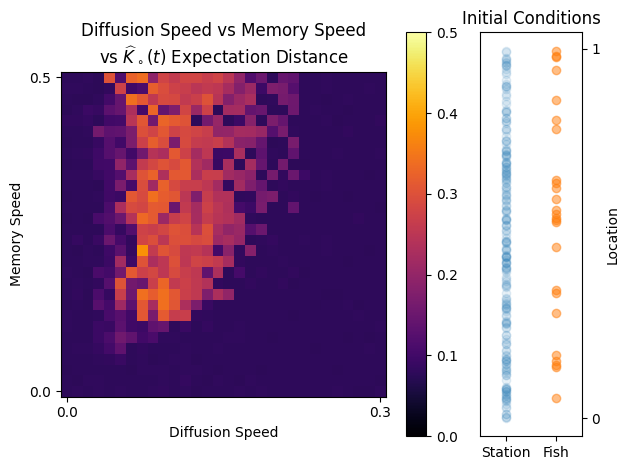

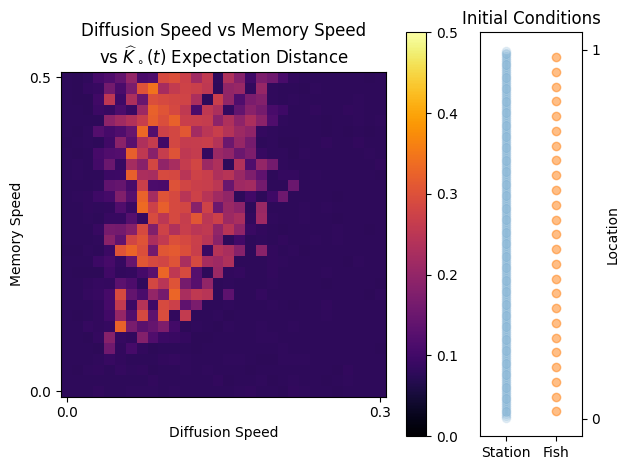

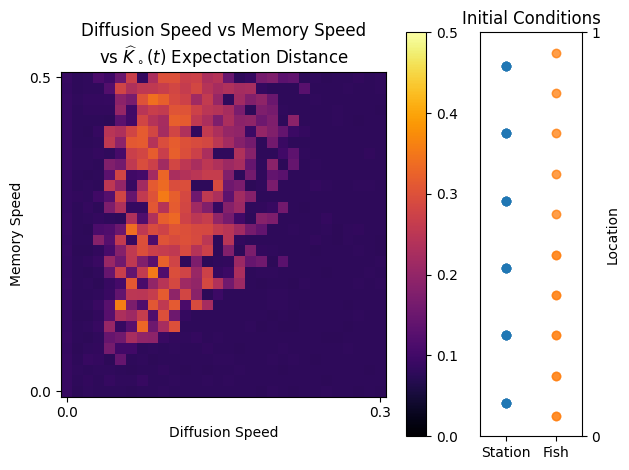

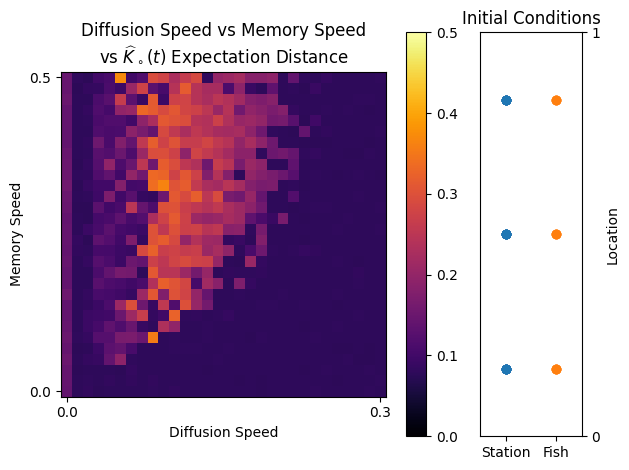

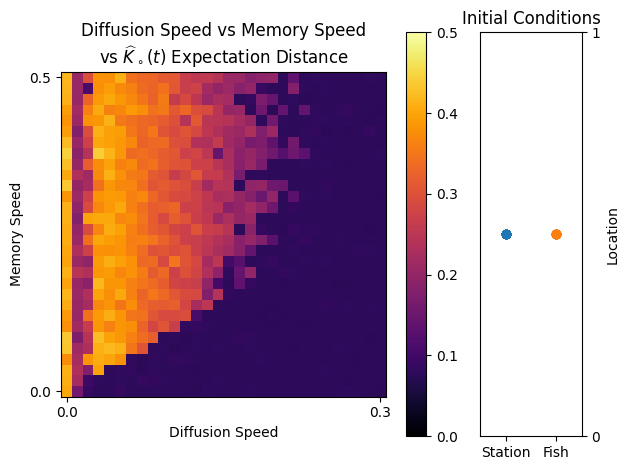

In [12]:
for i in range(5):
    fig, ax = plt.subplots(1,2, width_ratios=[0.8,0.2])
    im = ax[0].imshow(eks[i], origin="lower",cmap="inferno", vmin=0, vmax=0.5)
    fig.colorbar(im,ax=ax[0])
    ax[0].set_yticks([0,29],[np.min(mem_list), np.max(mem_list)])
    ax[0].set_xticks([0,29],[np.min(diff_list), np.max(diff_list)])
    ax[0].set_xlabel("Diffusion Speed")
    ax[0].set_ylabel("Memory Speed")
    ax[0].set_title("Diffusion Speed vs Memory Speed\nvs $\widehat{K}_\circ(t)$ Expectation Distance")
    ax[1].scatter([1/4 for x in run_ics[i][1]], run_ics[i][1], alpha=0.1)
    ax[1].scatter([3/4 for x in run_ics[i][0]], run_ics[i][0], alpha=0.5)
    ax[1].set_xlim(0,1)
    ax[1].set_xticks([1/4,3/4])
    ax[1].set_xticklabels(["Station", "Fish"])
    ax[1].set_yticks([0,1])
    ax[1].set_ylabel("Location")
    ax[1].set_title("Initial Conditions")
    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.tick_right()
    fig.tight_layout()
    
    # plt.show()
    plt.savefig(f"plots/mem_sens/run_{i}.png")

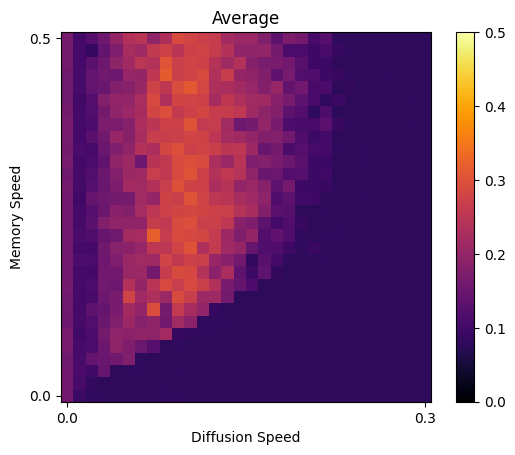

In [13]:
im = plt.imshow(eks_mean, origin="lower", cmap="inferno", vmin=0,vmax=0.5)
plt.colorbar(im)
plt.title("Average")
plt.yticks([0,29],[np.min(mem_list), np.max(mem_list)])
plt.xticks([0,29],[np.min(diff_list), np.max(diff_list)])
plt.ylabel("Memory Speed")
plt.xlabel("Diffusion Speed")
plt.savefig("plots/mem_sens/avg.png")

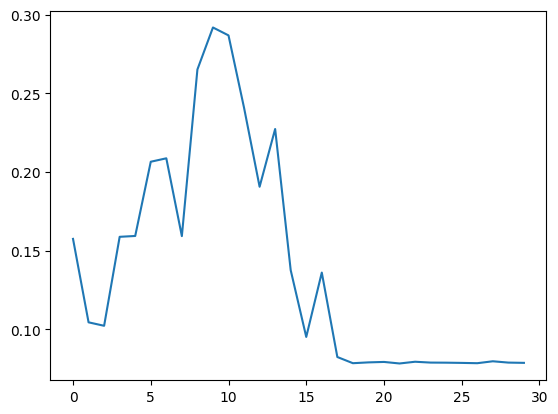

In [308]:
plt.plot(eks_mean[10])

In [290]:
len(run_finals[0][0][0])

112